In [1]:
import os

import elettra_toolbox
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from cpymad.madx import Madx
from matplotlib import cm, gridspec, patches
from pyhdtoolkit import cpymadtools
from pyhdtoolkit.utils import defaults

defaults.config_logger()
plt.rcParams.update({"text.usetex": False})

In [2]:
if os.path.exists("stdout.out"):
    os.remove("stdout.out")

# Launch MAD-X Session
with open("stdout.out", "w") as f:
    madx = Madx(stdout=f)

# Read parameters

from config import parameters, settings

for i in parameters.keys():
    madx.globals[i] = parameters[i]

# Call sequence and optics

madx.call("elettra2_v15_VADER_2.3T.madx")
madx.call("optics_elettra2_v15_VADER_2.3T.madx")

# Initial twiss

madx.use(sequence="ring")
madx.twiss(sequence="ring", table="init_twiss")

# Compute Emittance

madx.input(
    f"""
emit, deltap={madx.globals.deltap};
emit, deltap={madx.globals.deltap};
"""
)

# Stop MAD-X instance

# madx.quit()

# Get the emittance from the standard output

ex, ey, ez = elettra_toolbox.get_emittances_from_madx_output("stdout.out", to_meters=True)


print(f"Emittance x : {ex*1e12} pm")

twiss = madx.table.init_twiss.dframe()

# s_start = twiss[twiss.name == "ll:1"]["s"][0]
# s_end = twiss[twiss.name == "ll:3"]["s"][0]

# fig_lattice = cpymadtools.plotters.LatticePlotter.plot_latwiss(
#     madx=madx,
#     title="ELETTRA 2.0",
#     xlimits=(s_start, s_end),
#     disp_ylim=None,
#     k0l_lim=(-75 * 1e-3, 75 * 1e-3),
#     k1l_lim=(-1.5, 1.5),
#     plot_dipole_k1=True,
#     lw=2,
# )

# s_start = twiss[twiss.name == "bf1:1"]["s"][0] - twiss[twiss.name == "bf1:1"]["l"][0] / 2
# s_end = twiss[twiss.name == "bf1:2"]["s"][0] - twiss[twiss.name == "bf1:2"]["l"][0] / 2

# fig_lattice = cpymadtools.plotters.LatticePlotter.plot_latwiss(
#     madx=madx,
#     title="ELETTRA 2.0",
#     xlimits=(s_start, s_end),
#     disp_ylim=(-0.004, 0.004),
#     k0l_lim=(-75 * 1e-3, 75 * 1e-3),
#     k1l_lim=(-1.5, 1.5),
#     plot_dipole_k1=True,
#     lw=2,
# )

# Let's install some markers

madx.input('''
left_marker: marker;
right_marker: marker;
middle_marker: marker;

use, sequence=ring;
seqedit, sequence=ring;
flatten;
install, element=left_marker, at=10.8;
install, element=middle_marker, at=21.6;
install, element=right_marker, at=32.4;
flatten;
endedit;
''')

madx.use(sequence='ring')
madx.twiss(sequence='ring');
twiss = madx.table.twiss.dframe()

Emittance x : 929.73166 pm


2021-10-12 18:35:30 | INFO     | pyhdtoolkit.cpymadtools.plotters:638 - Plotting optics functions and machine layout
2021-10-12 18:35:32 | INFO     | pyhdtoolkit.cpymadtools.plotters:695 - Saving latwiss plot as raw_no_AB.pdf


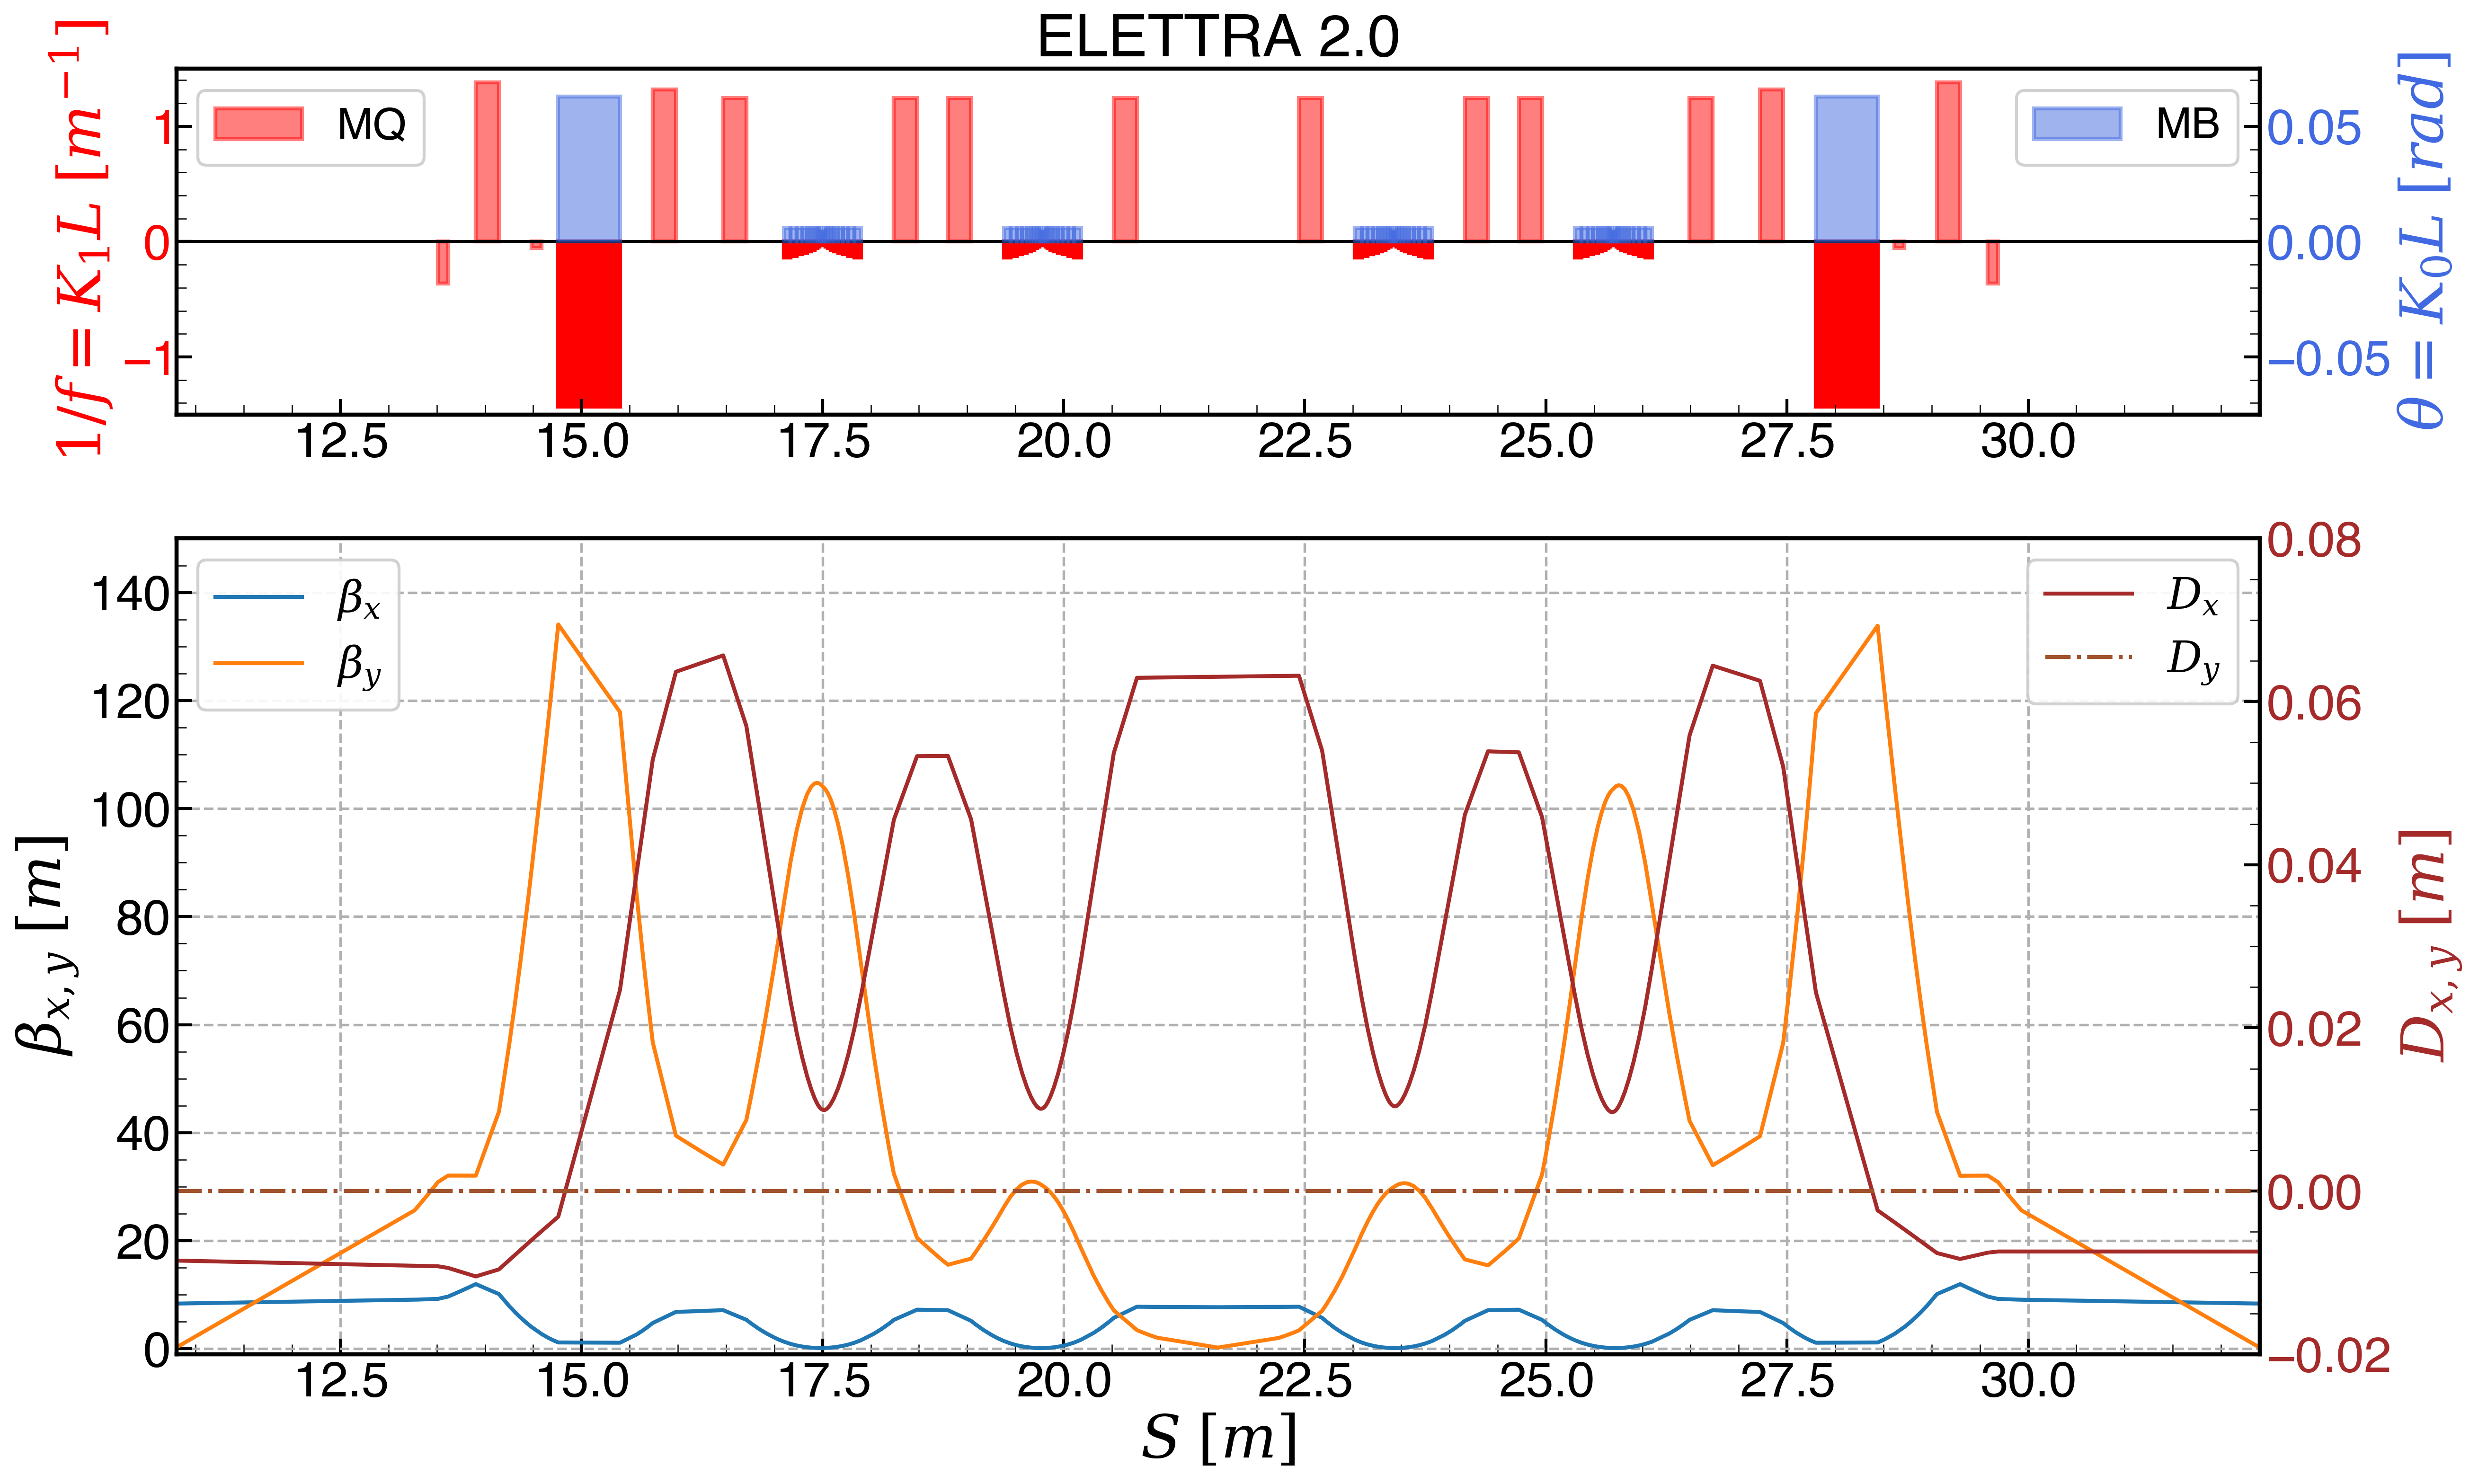

In [3]:
s_start = twiss[twiss.name == "left_marker:1"]["s"][0]
s_end = twiss[twiss.name == "right_marker:1"]["s"][0]

fig_lattice = cpymadtools.plotters.LatticePlotter.plot_latwiss(
    madx=madx,
    title="ELETTRA 2.0",
    xlimits=(s_start, s_end),
    disp_ylim=(-0.02,0.08),
    beta_ylim=(-1, 150),
    k0l_lim=(-75 * 1e-3, 75 * 1e-3),
    k1l_lim=(-1.5, 1.5),
    plot_dipole_k1=True,
    lw=2,
    savefig='raw_no_AB.pdf'
)

In [4]:
# match 

madx.input('''

use, sequence=ring;

match, range=middle_marker/right_marker, betx=7.726541, bety=1.181956, dx=0.056474, dy=0;

vary, name=k1_qd1, step=1e-10, lower=-4, upper=-3;
vary, name=k1_qf1, step=1e-10, lower=5, upper=6;
vary, name=k1_qd2, step=1e-10, lower=-1, upper=0;
vary, name=k1_qf2, step=1e-10, lower=5, upper=6;
vary, name=k1_bqf1, step=1e-10, lower=5, upper=6;
vary, name=k1_bqf2, step=1e-10, lower=5, upper=6;
vary, name=k1_bqf3, step=1e-10, lower=5, upper=6;
vary, name=k1_bqf4, step=1e-10, lower=5, upper=6;



constraint, range=middle_marker/right_marker, bety<30.0;
constraint, range=right_marker, betx=8.373589, bety=1.403831, dx=0, dy=0;



jacobian, calls=1000, tolerance=1e-21;
endmatch;

use, sequence=ring;
twiss;
''')

print(madx.globals.tar)

1.56299606828841e-25


++++++ Error: seterrorflag : Errorcode: 1   Reported from pro_twiss:
++++++ Error: seterrorflag : Description: TWISS failed


In [4]:
# match 

madx.input('''

use, sequence=ring;

match, range=left_marker/right_marker, betx=8.366583, bety=0.239541, dx=-0.008524, dy=0;
!match, range=left_marker/right_marker;

vary, name=k1_qd1, step=1e-10;
vary, name=k1_qf1, step=1e-10;
vary, name=k1_qd2, step=1e-10;
vary, name=k1_qf2, step=1e-10;
vary, name=k1_bqf1, step=1e-10;
vary, name=k1_bqf2, step=1e-10;
vary, name=k1_bqf3, step=1e-10;
vary, name=k1_bqf4, step=1e-10;
vary, name=k1_vader, step=1e-10;


constraint, range=left_marker/right_marker, bety<30.0;
constraint, range=middle_marker, betx=7.726541, bety=1.181956, dx=0.056474, dy=0;
constraint, range=right_marker, betx=8.373589, bety=1.403831, dx=0, dy=0;
constraint, range=left_marker, betx=8.36888, bety=1.410758, dx=0, dy=0;
constraint, range=qd1_s01.2[1], dx=0;
constraint, range=qd1_s02.1[2], dx=0;



lmdif, calls=20000, tolerance=1e-21;
endmatch;

use, sequence=ring;
twiss;
''')

print(madx.globals.tar)

2.287179801598668


2021-10-12 09:44:19 | INFO     | pyhdtoolkit.cpymadtools.plotters:638 - Plotting optics functions and machine layout


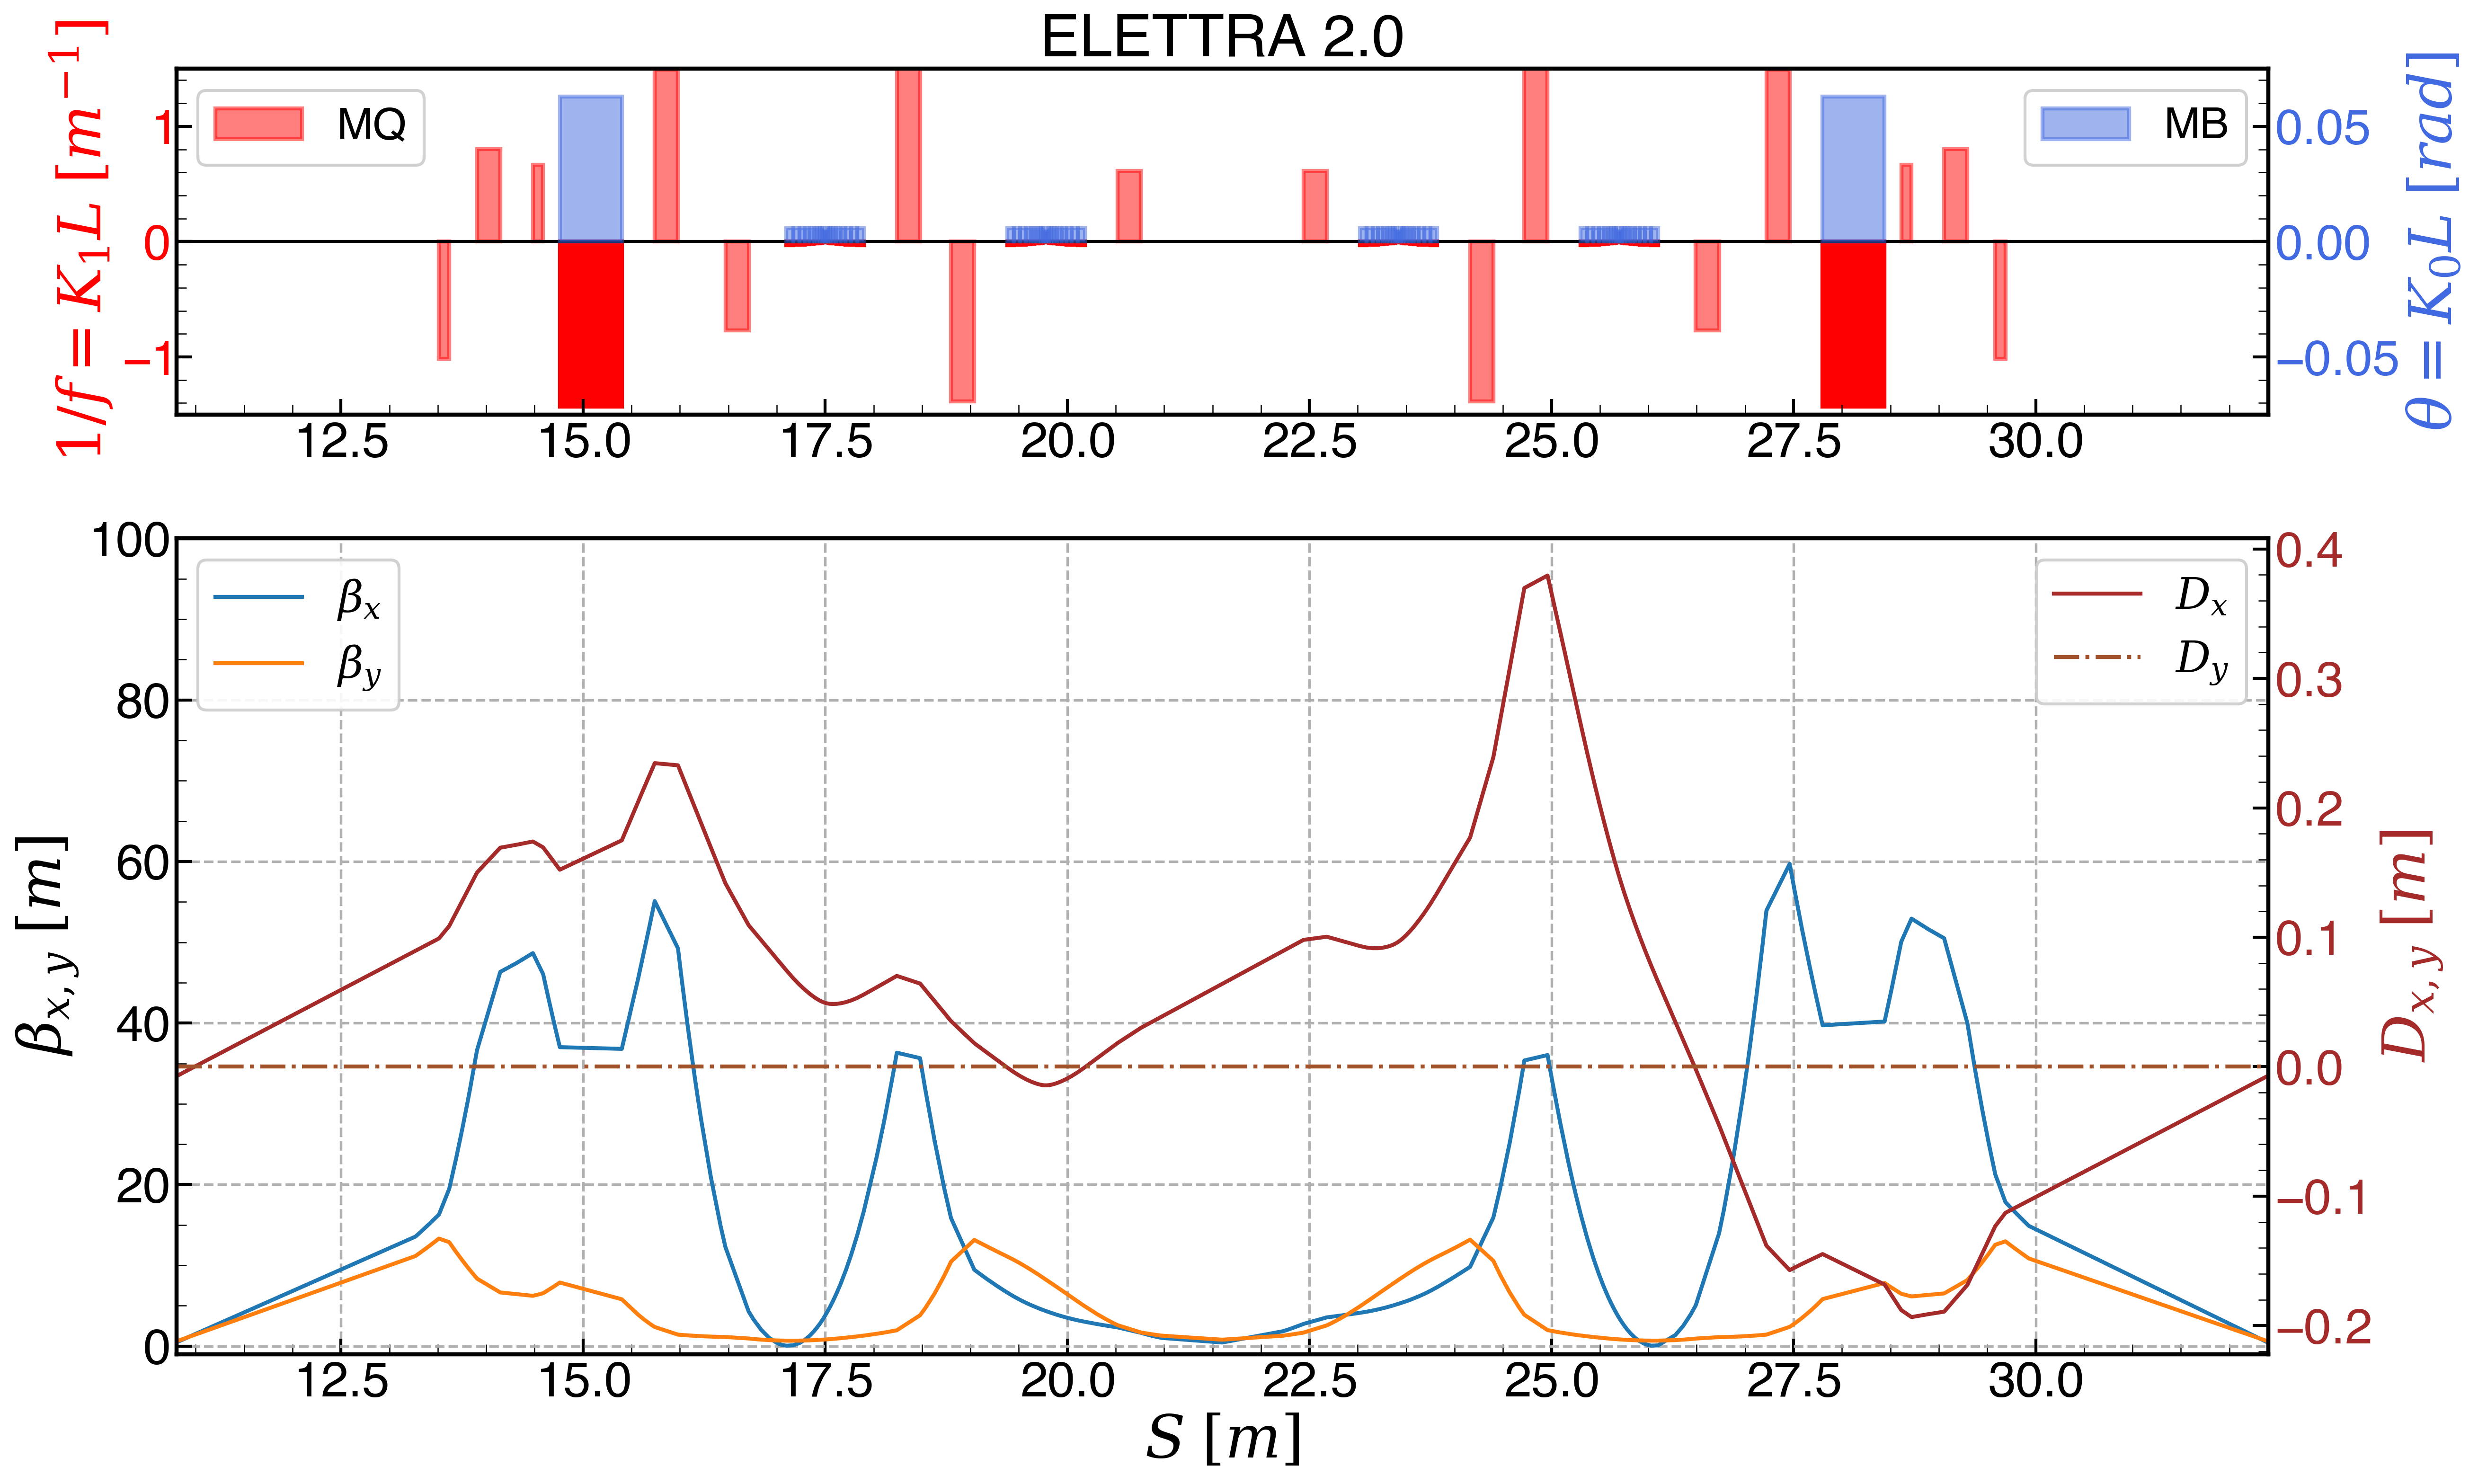

In [10]:
s_start = twiss[twiss.name == "ll:1"]["s"][0]
s_end = twiss[twiss.name == "ll:3"]["s"][0]

#disp_ylim=(-0.02,0.08)

fig_lattice = cpymadtools.plotters.LatticePlotter.plot_latwiss(
    madx=madx,
    title="ELETTRA 2.0",
    xlimits=(s_start, s_end),
    disp_ylim=None,
    beta_ylim=(-1, 100),
    k0l_lim=(-75 * 1e-3, 75 * 1e-3),
    k1l_lim=(-1.5, 1.5),
    plot_dipole_k1=True,
    lw=2
)

2021-10-11 16:22:53 | INFO     | pyhdtoolkit.cpymadtools.plotters:638 - Plotting optics functions and machine layout


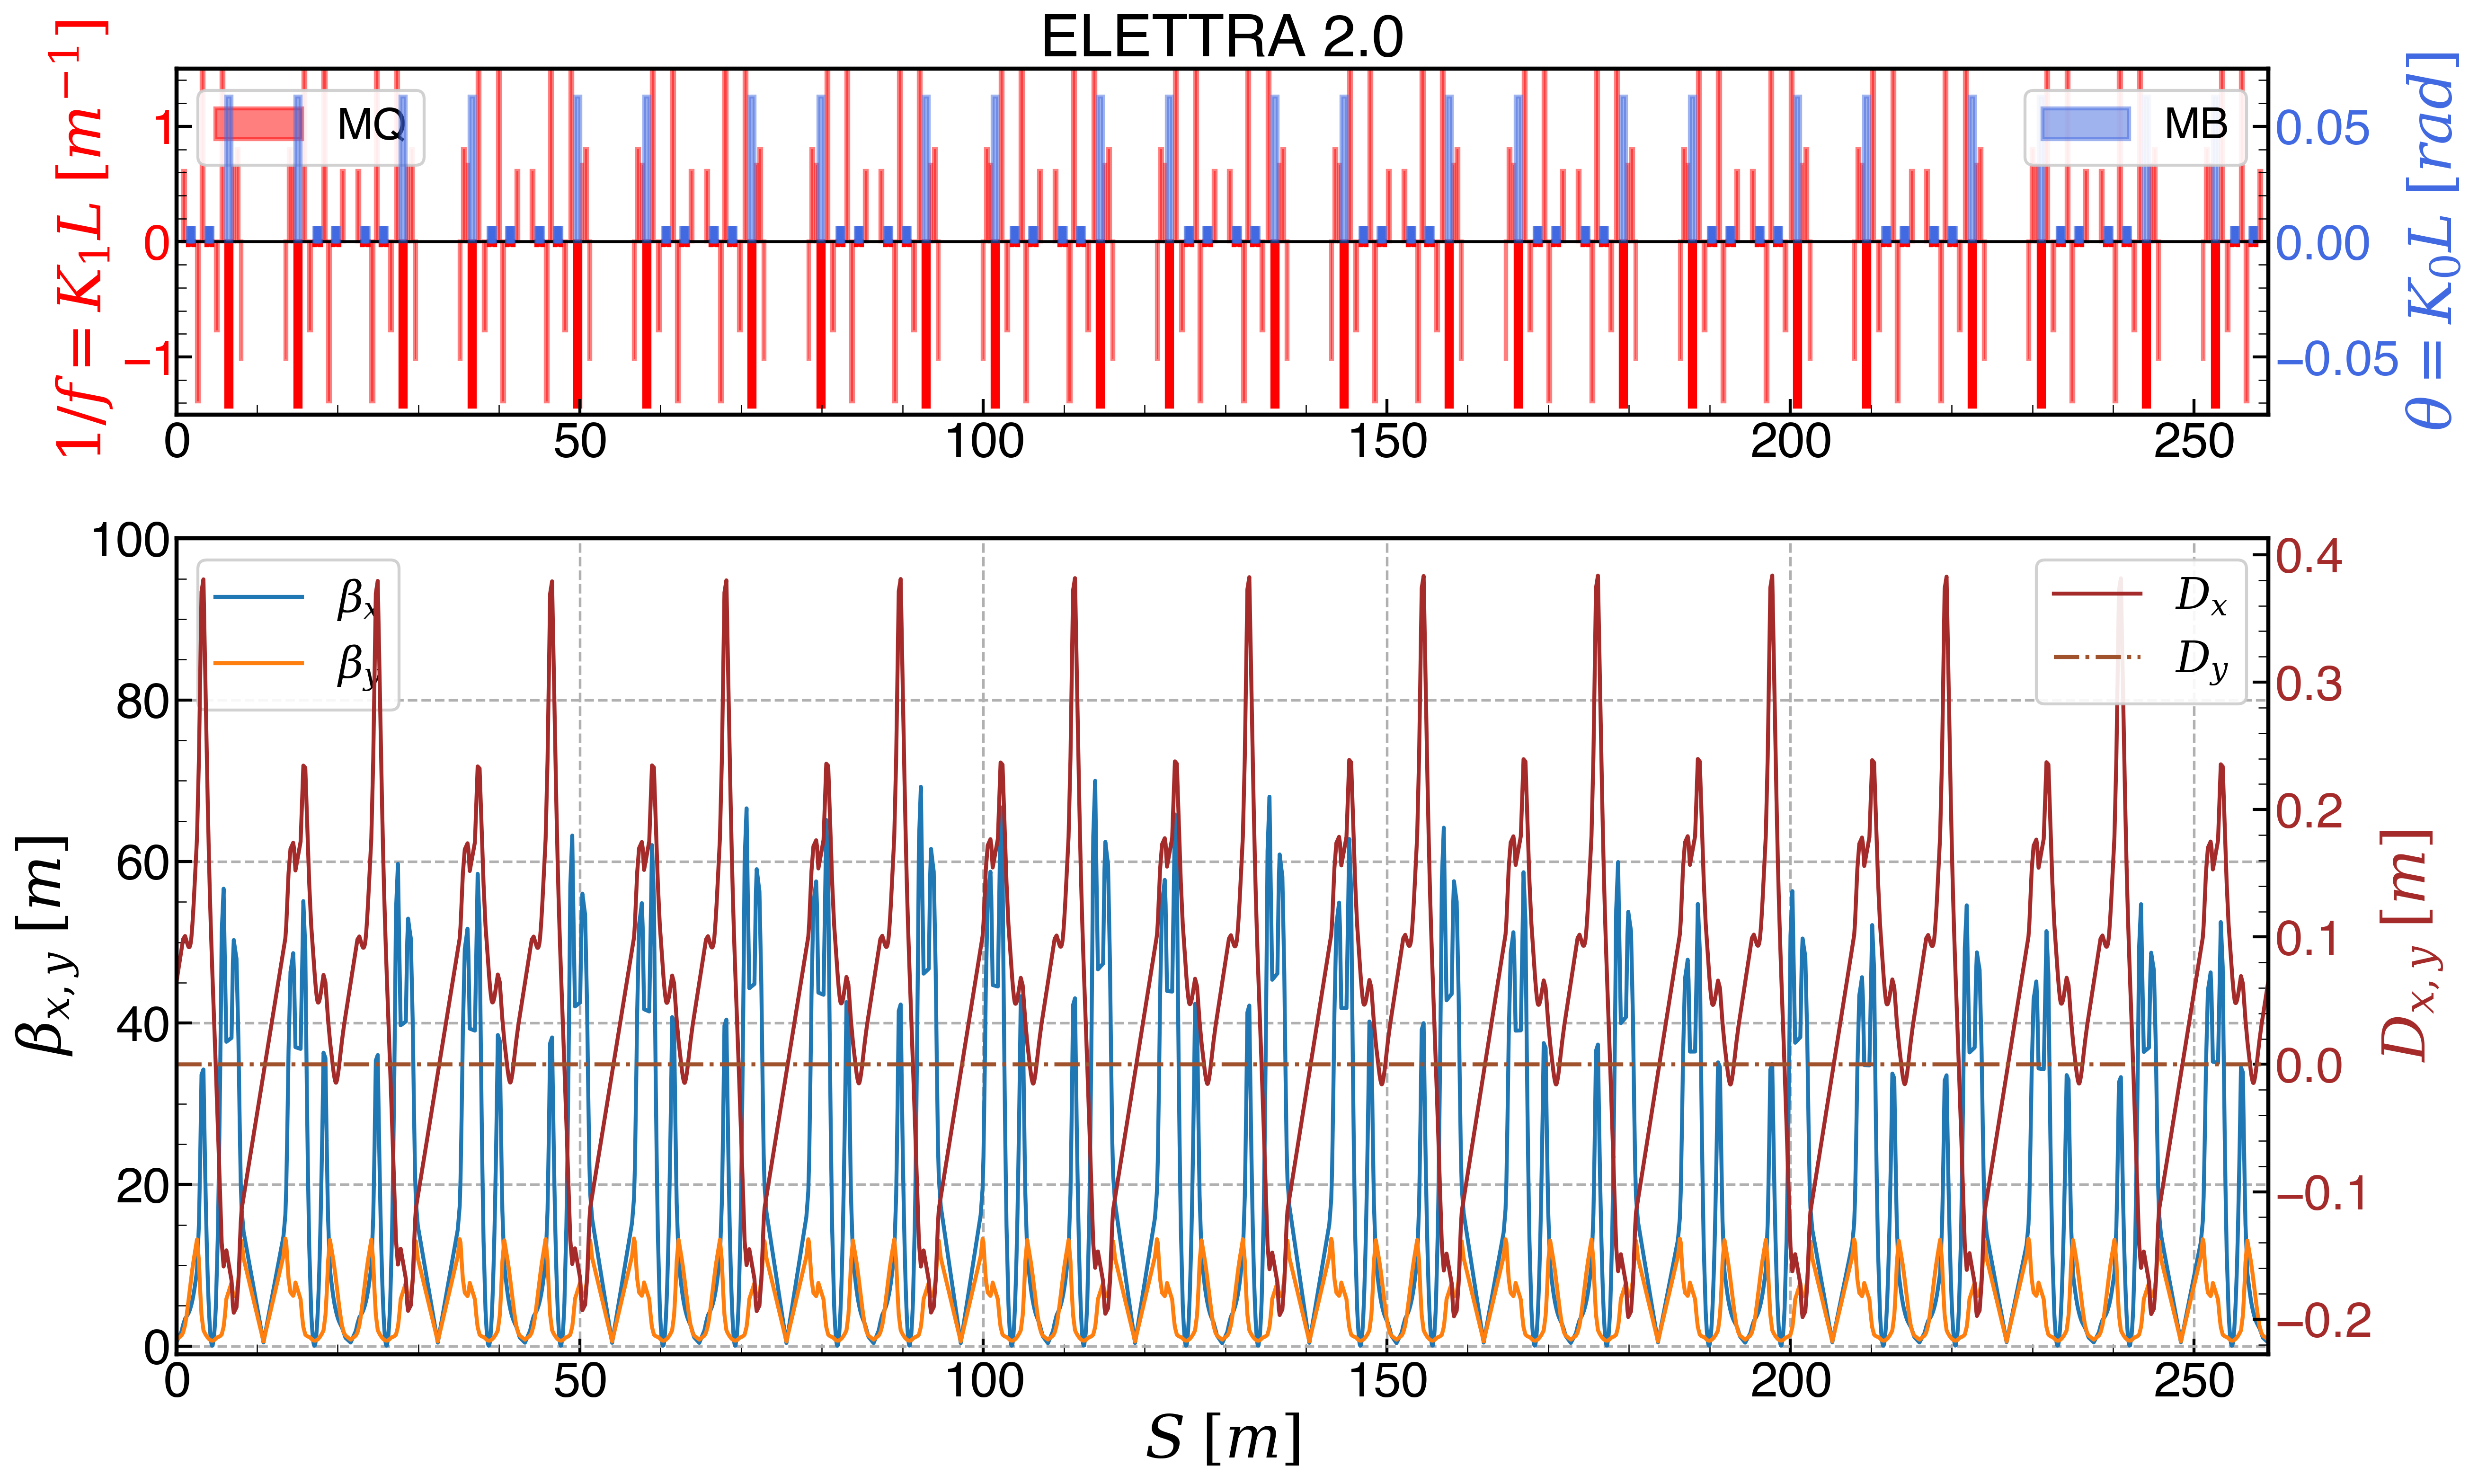

In [9]:
s_start = twiss[twiss.name == "ll:1"]["s"][0]
s_end = twiss[twiss.name == "ll:3"]["s"][0]

#disp_ylim=(-0.02,0.08)

fig_lattice = cpymadtools.plotters.LatticePlotter.plot_latwiss(
    madx=madx,
    title="ELETTRA 2.0",
    xlimits=None,
    disp_ylim=None,
    beta_ylim=(-1, 100),
    k0l_lim=(-75 * 1e-3, 75 * 1e-3),
    k1l_lim=(-1.5, 1.5),
    plot_dipole_k1=True,
    lw=2,
)

In [ ]:
# match 

madx.input('''

use, sequence=ring;

!match, range=left_marker/right_marker, betx=8.36888, bety=1.410758, dx=0, dy=0;
match, range=left_marker/right_marker;

vary, name=k1_qd1, step=1e-6;
vary, name=k1_qf1, step=1e-6;
vary, name=k1_qd2, step=1e-6;
vary, name=k1_qf2, step=1e-6;
vary, name=k1_bqf1, step=1e-6;
vary, name=k1_bqf2, step=1e-6;
vary, name=k1_bqf3, step=1e-6;
vary, name=k1_bqf4, step=1e-6;

!constraint, range=left_marker/right_marker, bety<30.0;
!constraint, range=middle_marker, betx=7.726541, bety=1.181956, dx=0.056474, dy=0;
!constraint, range=right_marker, betx=8.373589, bety=1.403831, dx=0, dy=0;
!constraint, range=left_marker, betx=8.36888, bety=1.410758, dx=0, dy=0;
constraint, range=qd1_s01.2[1], dx=0;
constraint, range=qd1_s02.1[2], dx=0;



lmdif, calls=10000, tolerance=1e-21;
endmatch;

use, sequence=ring;
twiss;
''')

In [7]:
# Compute Emittance

madx.input(
    f"""
emit, deltap={madx.globals.deltap};
emit, deltap={madx.globals.deltap};
"""
)

# Stop MAD-X instance

# madx.quit()

# Get the emittance from the standard output

ex, ey, ez = elettra_toolbox.get_emittances_from_madx_output("stdout.out", to_meters=True)


print(f"Emittance x : {ex*1e12} pm")

Emittance x : 58743.78200000001 pm


In [6]:
twiss = madx.table.twiss.dframe()

In [7]:
twiss[twiss.name=='left_marker:1'][['betx','bety','dx','dy']]

betx      bety        dx   dy
left_marker  8.378247  0.106287  0.000165  0.0

In [17]:
twiss[twiss.name=='right_marker:1'][['betx','bety','dx','dy']]

betx      bety       dx   dy
right_marker  7.899866  1.088047 -0.00663  0.0

In [18]:
twiss[twiss.name=='middle_marker:1'][['betx','bety','dx','dy']]

betx      bety        dx   dy
middle_marker  7.490724  0.974621  0.062128  0.0

In [22]:
init_twiss = madx.table.init_twiss.dframe()

2021-10-08 12:16:12 | INFO     | pyhdtoolkit.cpymadtools.plotters:638 - Plotting optics functions and machine layout


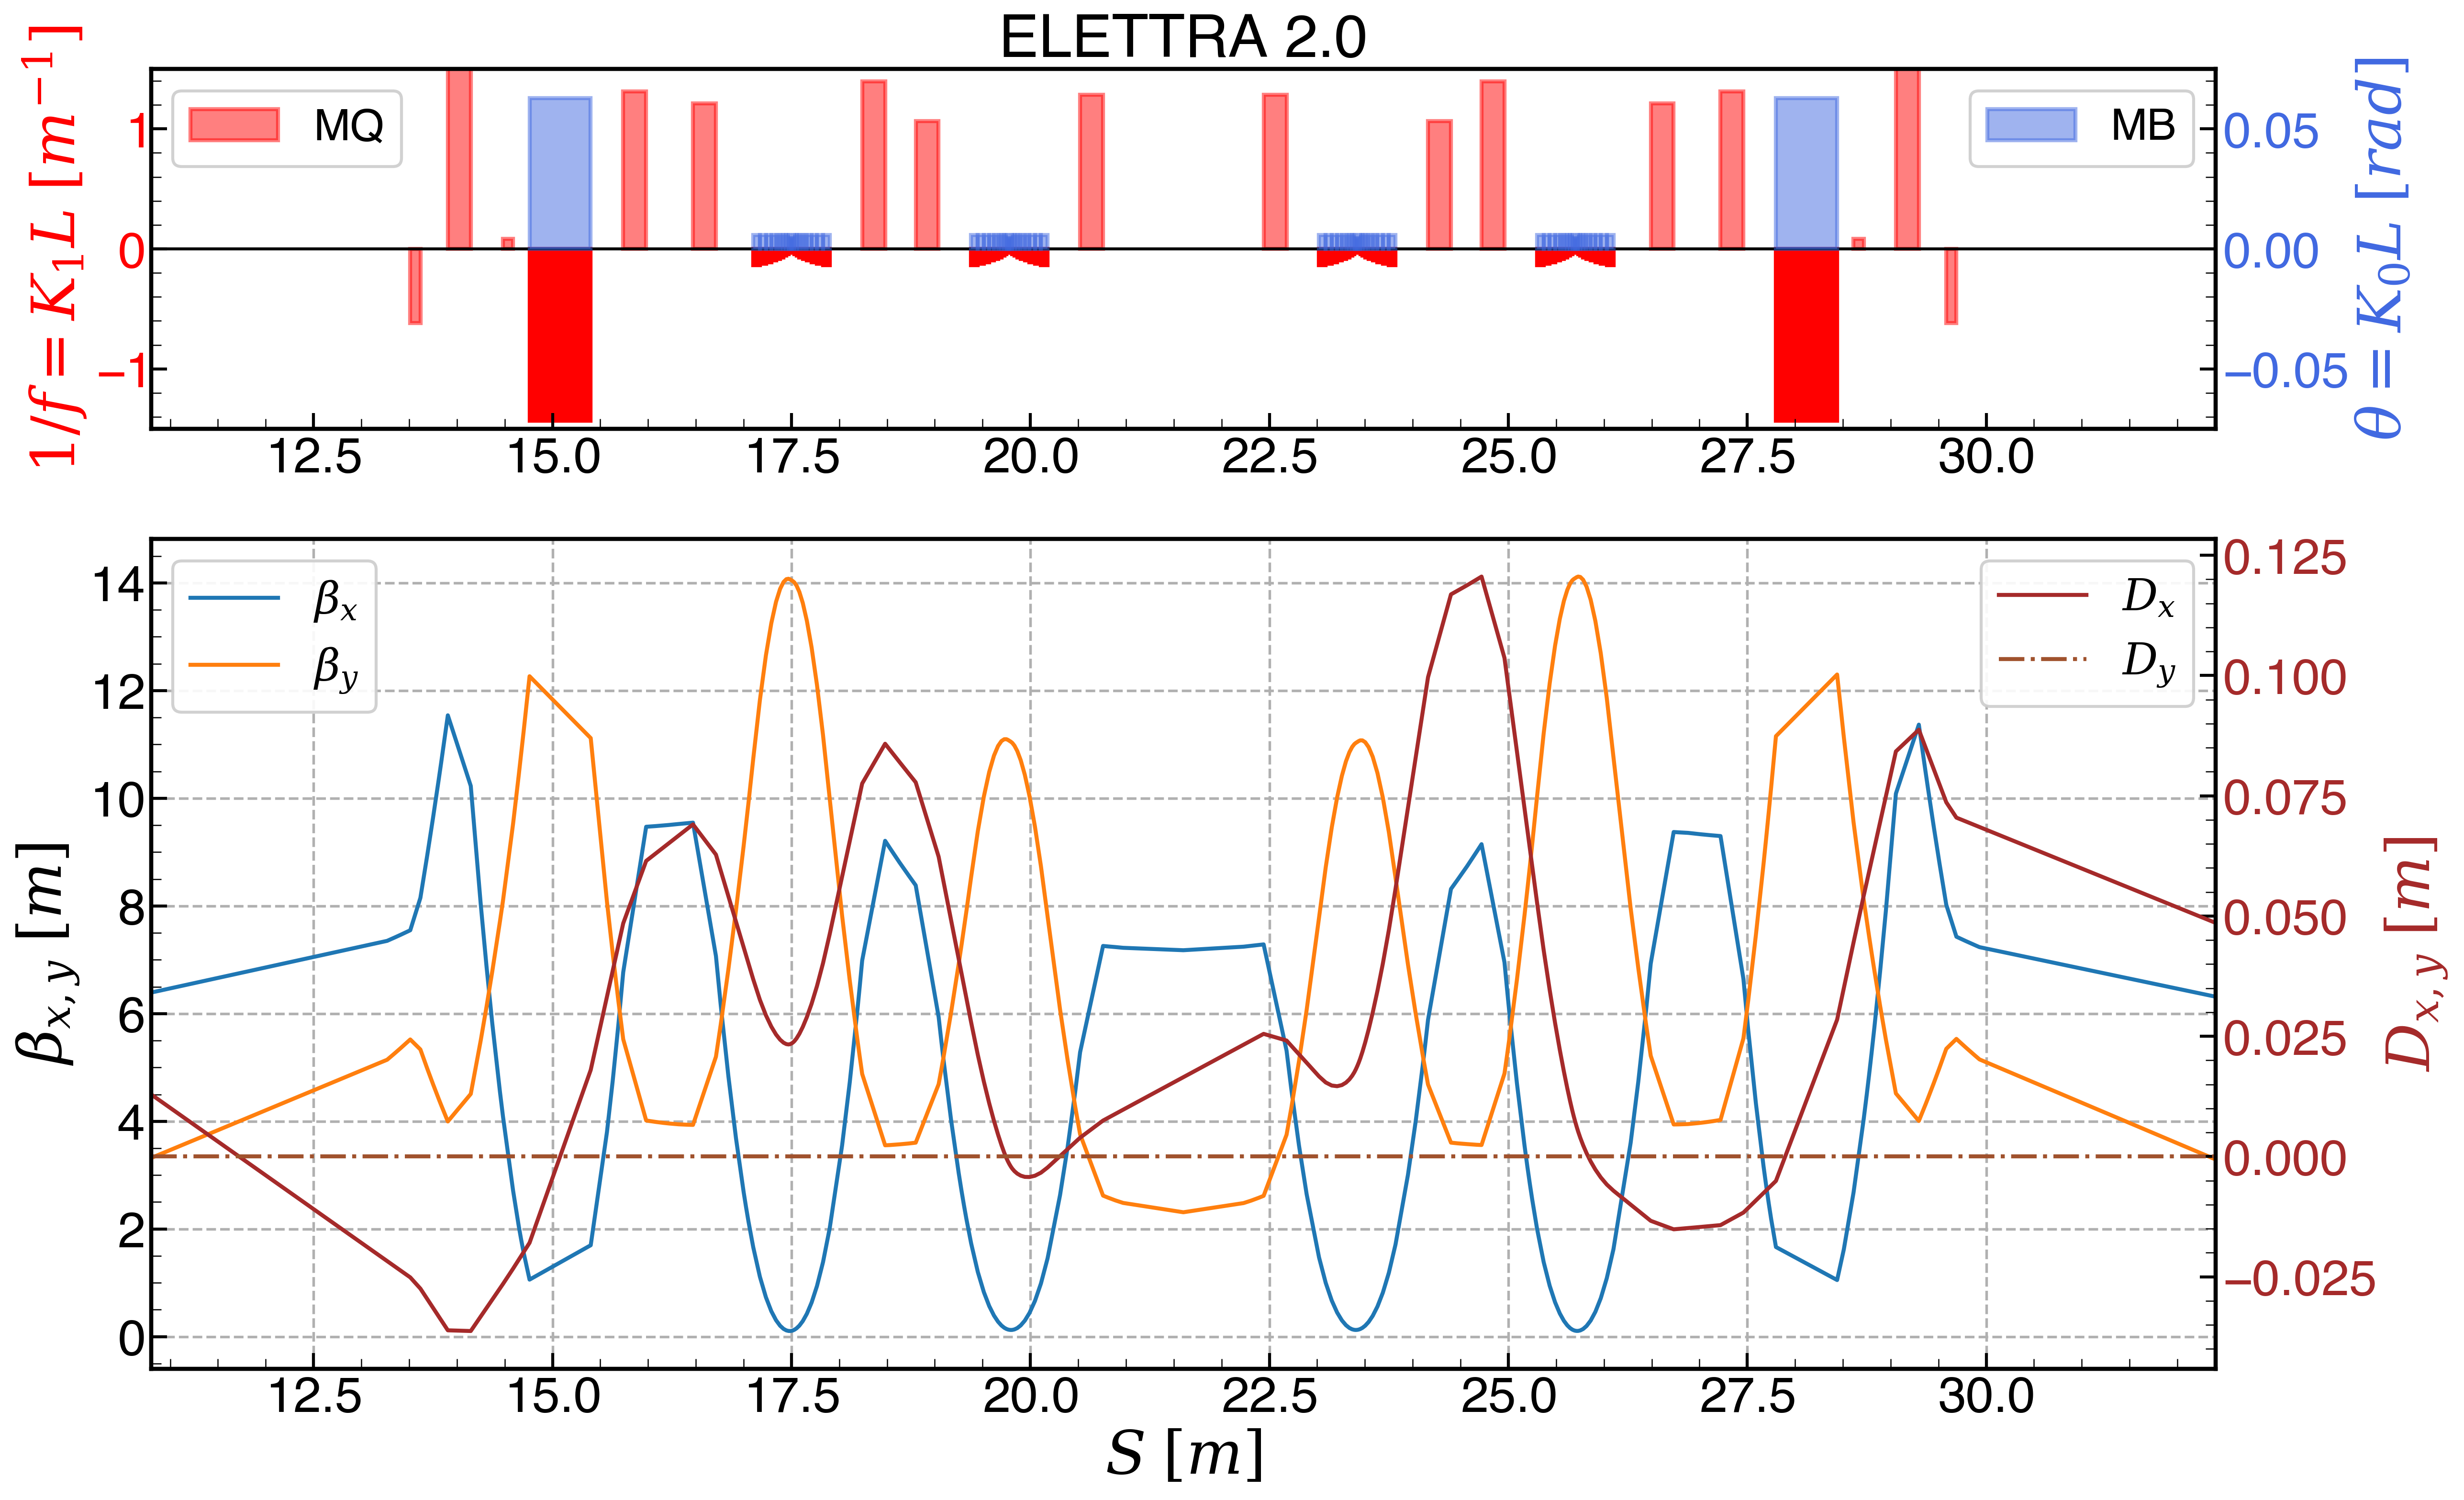

In [18]:
s_start = twiss[twiss.name == "ll:1"]["s"][0]
s_end = twiss[twiss.name == "ll:3"]["s"][0]

fig_lattice = cpymadtools.plotters.LatticePlotter.plot_latwiss(
    madx=madx,
    title="ELETTRA 2.0",
    xlimits=(s_start, s_end),
    disp_ylim=None,
    k0l_lim=(-75 * 1e-3, 75 * 1e-3),
    k1l_lim=(-1.5, 1.5),
    plot_dipole_k1=True,
    lw=2,
)

2021-10-08 11:51:24 | INFO     | pyhdtoolkit.cpymadtools.plotters:638 - Plotting optics functions and machine layout


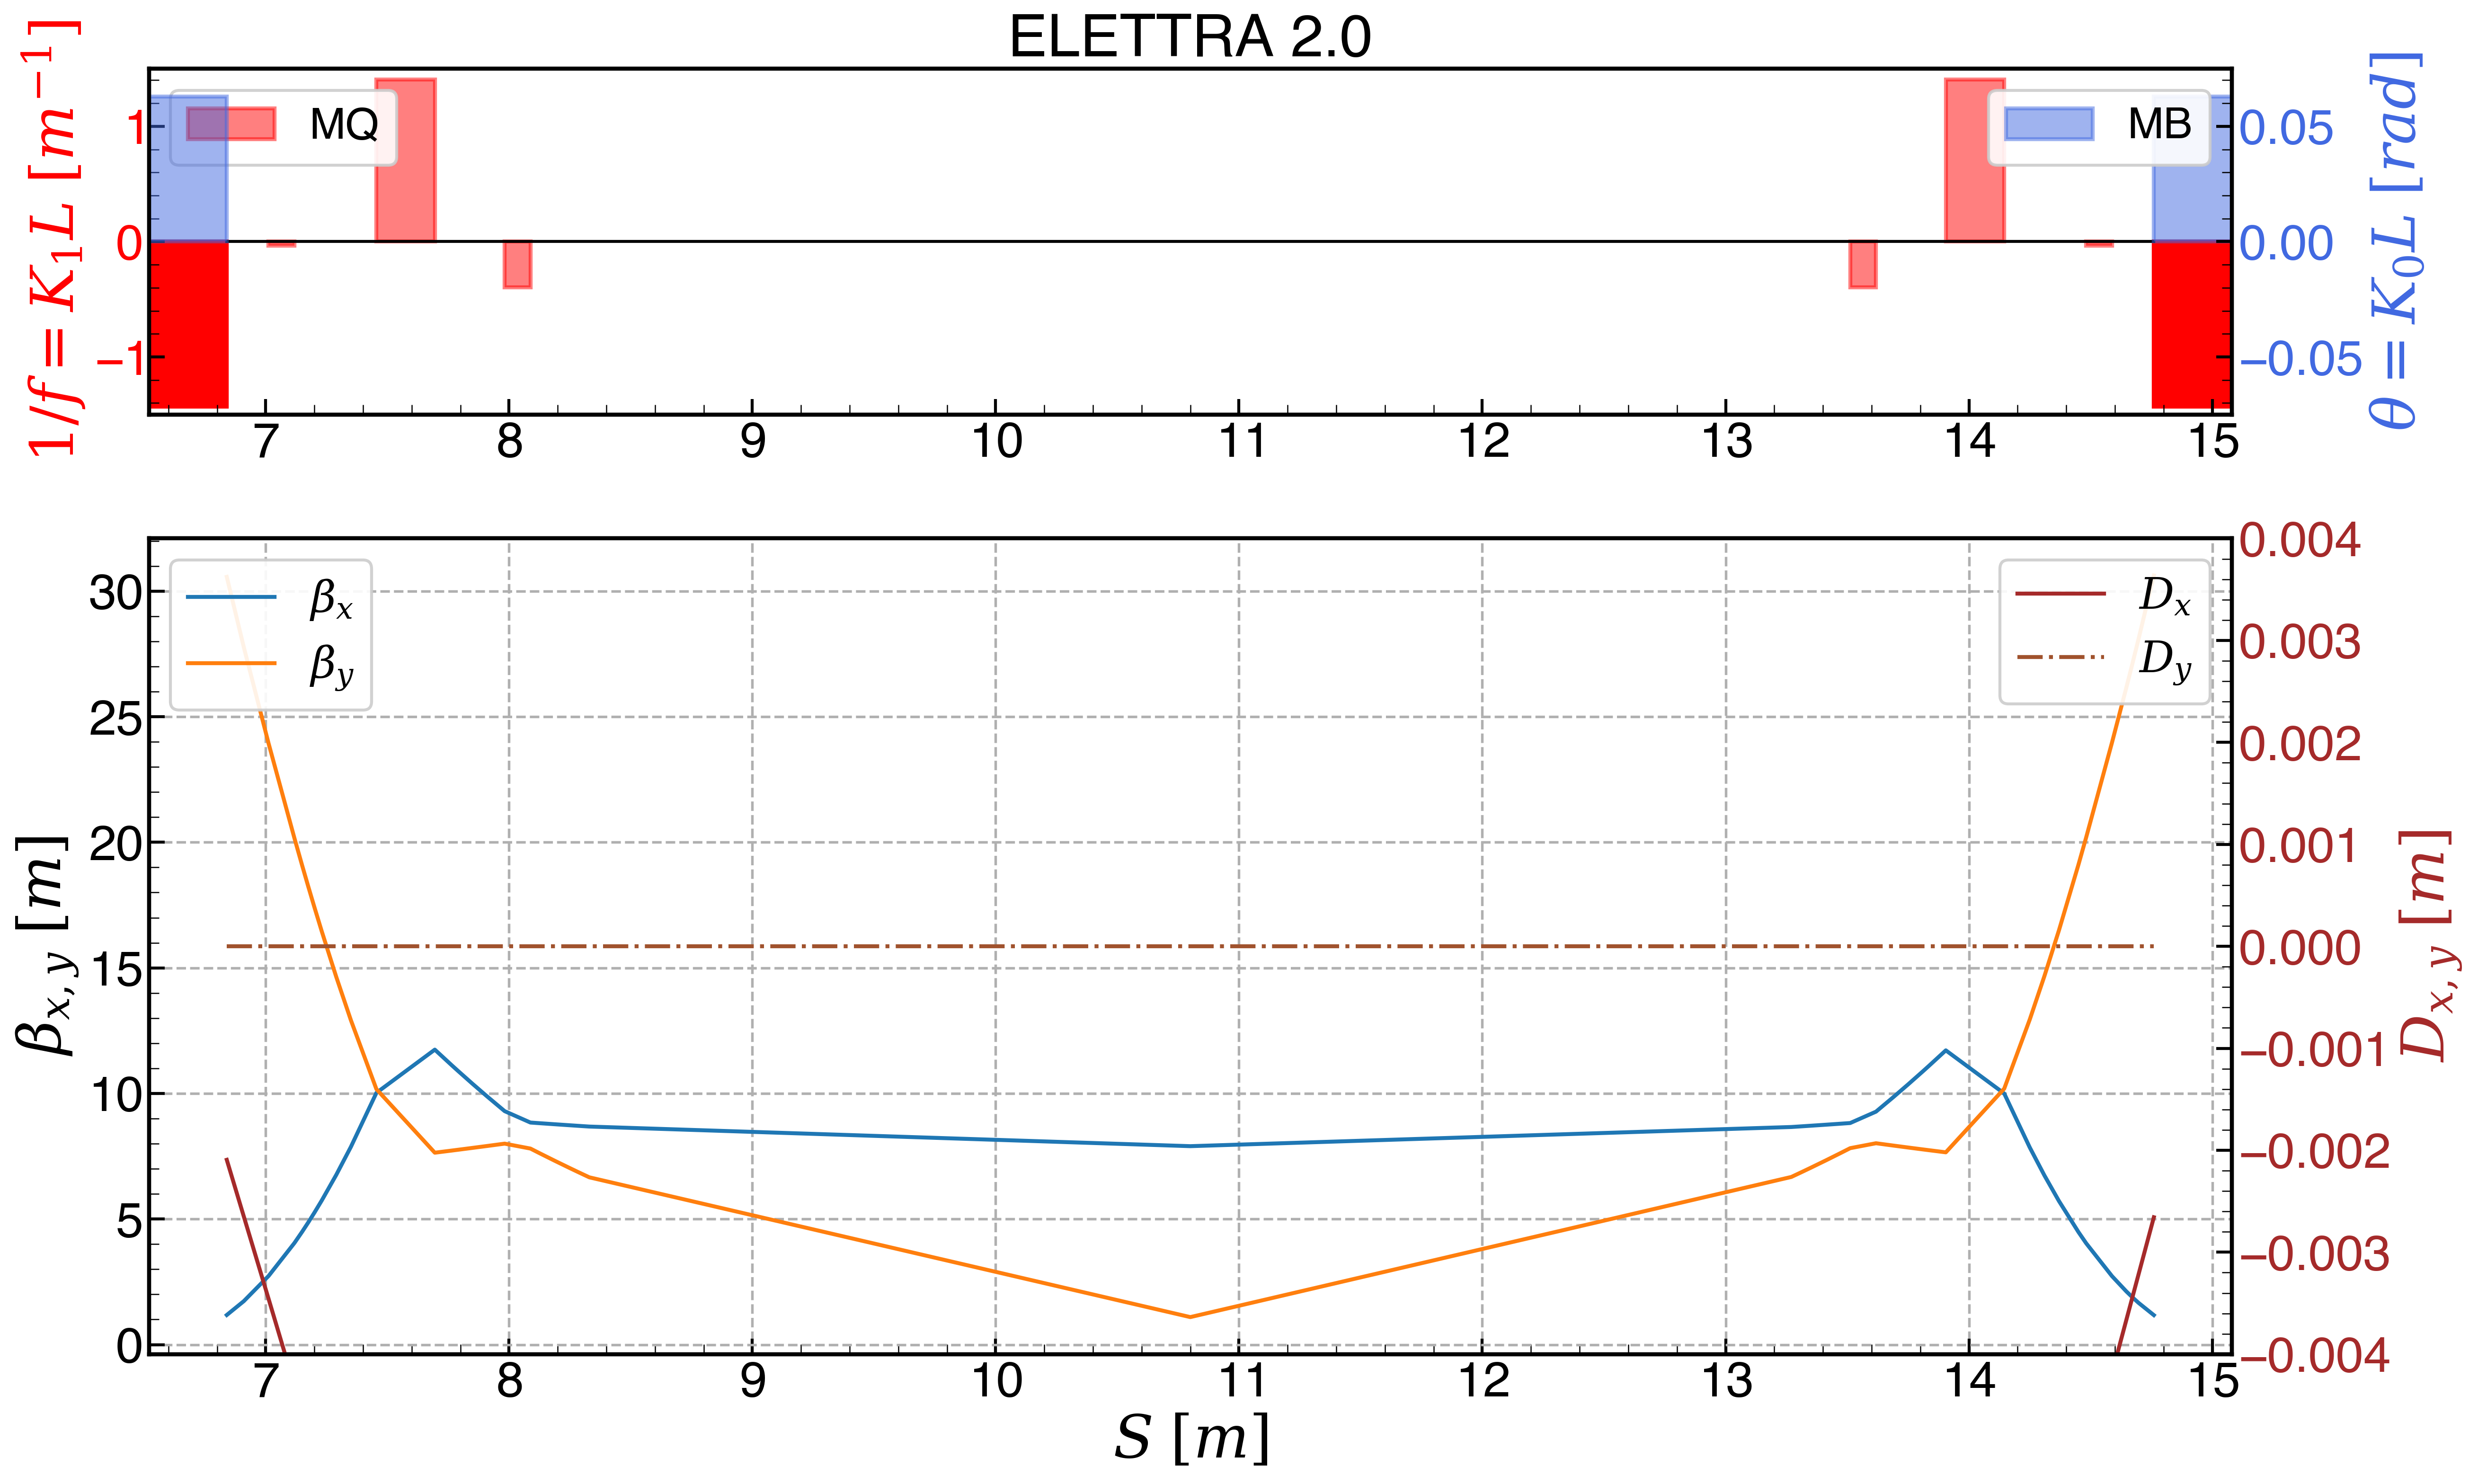

In [13]:
s_start = twiss[twiss.name == "bf1:1"]["s"][0] - twiss[twiss.name == "bf1:1"]["l"][0] / 2
s_end = twiss[twiss.name == "bf1:2"]["s"][0] - twiss[twiss.name == "bf1:2"]["l"][0] / 2

fig_lattice = cpymadtools.plotters.LatticePlotter.plot_latwiss(
    madx=madx,
    title="ELETTRA 2.0",
    xlimits=(s_start, s_end),
    disp_ylim=(-0.004, 0.004),
    k0l_lim=(-75 * 1e-3, 75 * 1e-3),
    k1l_lim=(-1.5, 1.5),
    plot_dipole_k1=True,
    lw=2,
)

In [20]:
# Compute Emittance

madx.input(
    f"""
emit, deltap={madx.globals.deltap};
emit, deltap={madx.globals.deltap};
"""
)

# Stop MAD-X instance

# madx.quit()

# Get the emittance from the standard output

ex, ey, ez = elettra_toolbox.get_emittances_from_madx_output("stdout.out", to_meters=True)


print(f"Emittance x : {ex*1e12} pm")

Emittance x : 929.73166 pm


2021-10-08 11:57:37 | INFO     | pyhdtoolkit.cpymadtools.plotters:638 - Plotting optics functions and machine layout


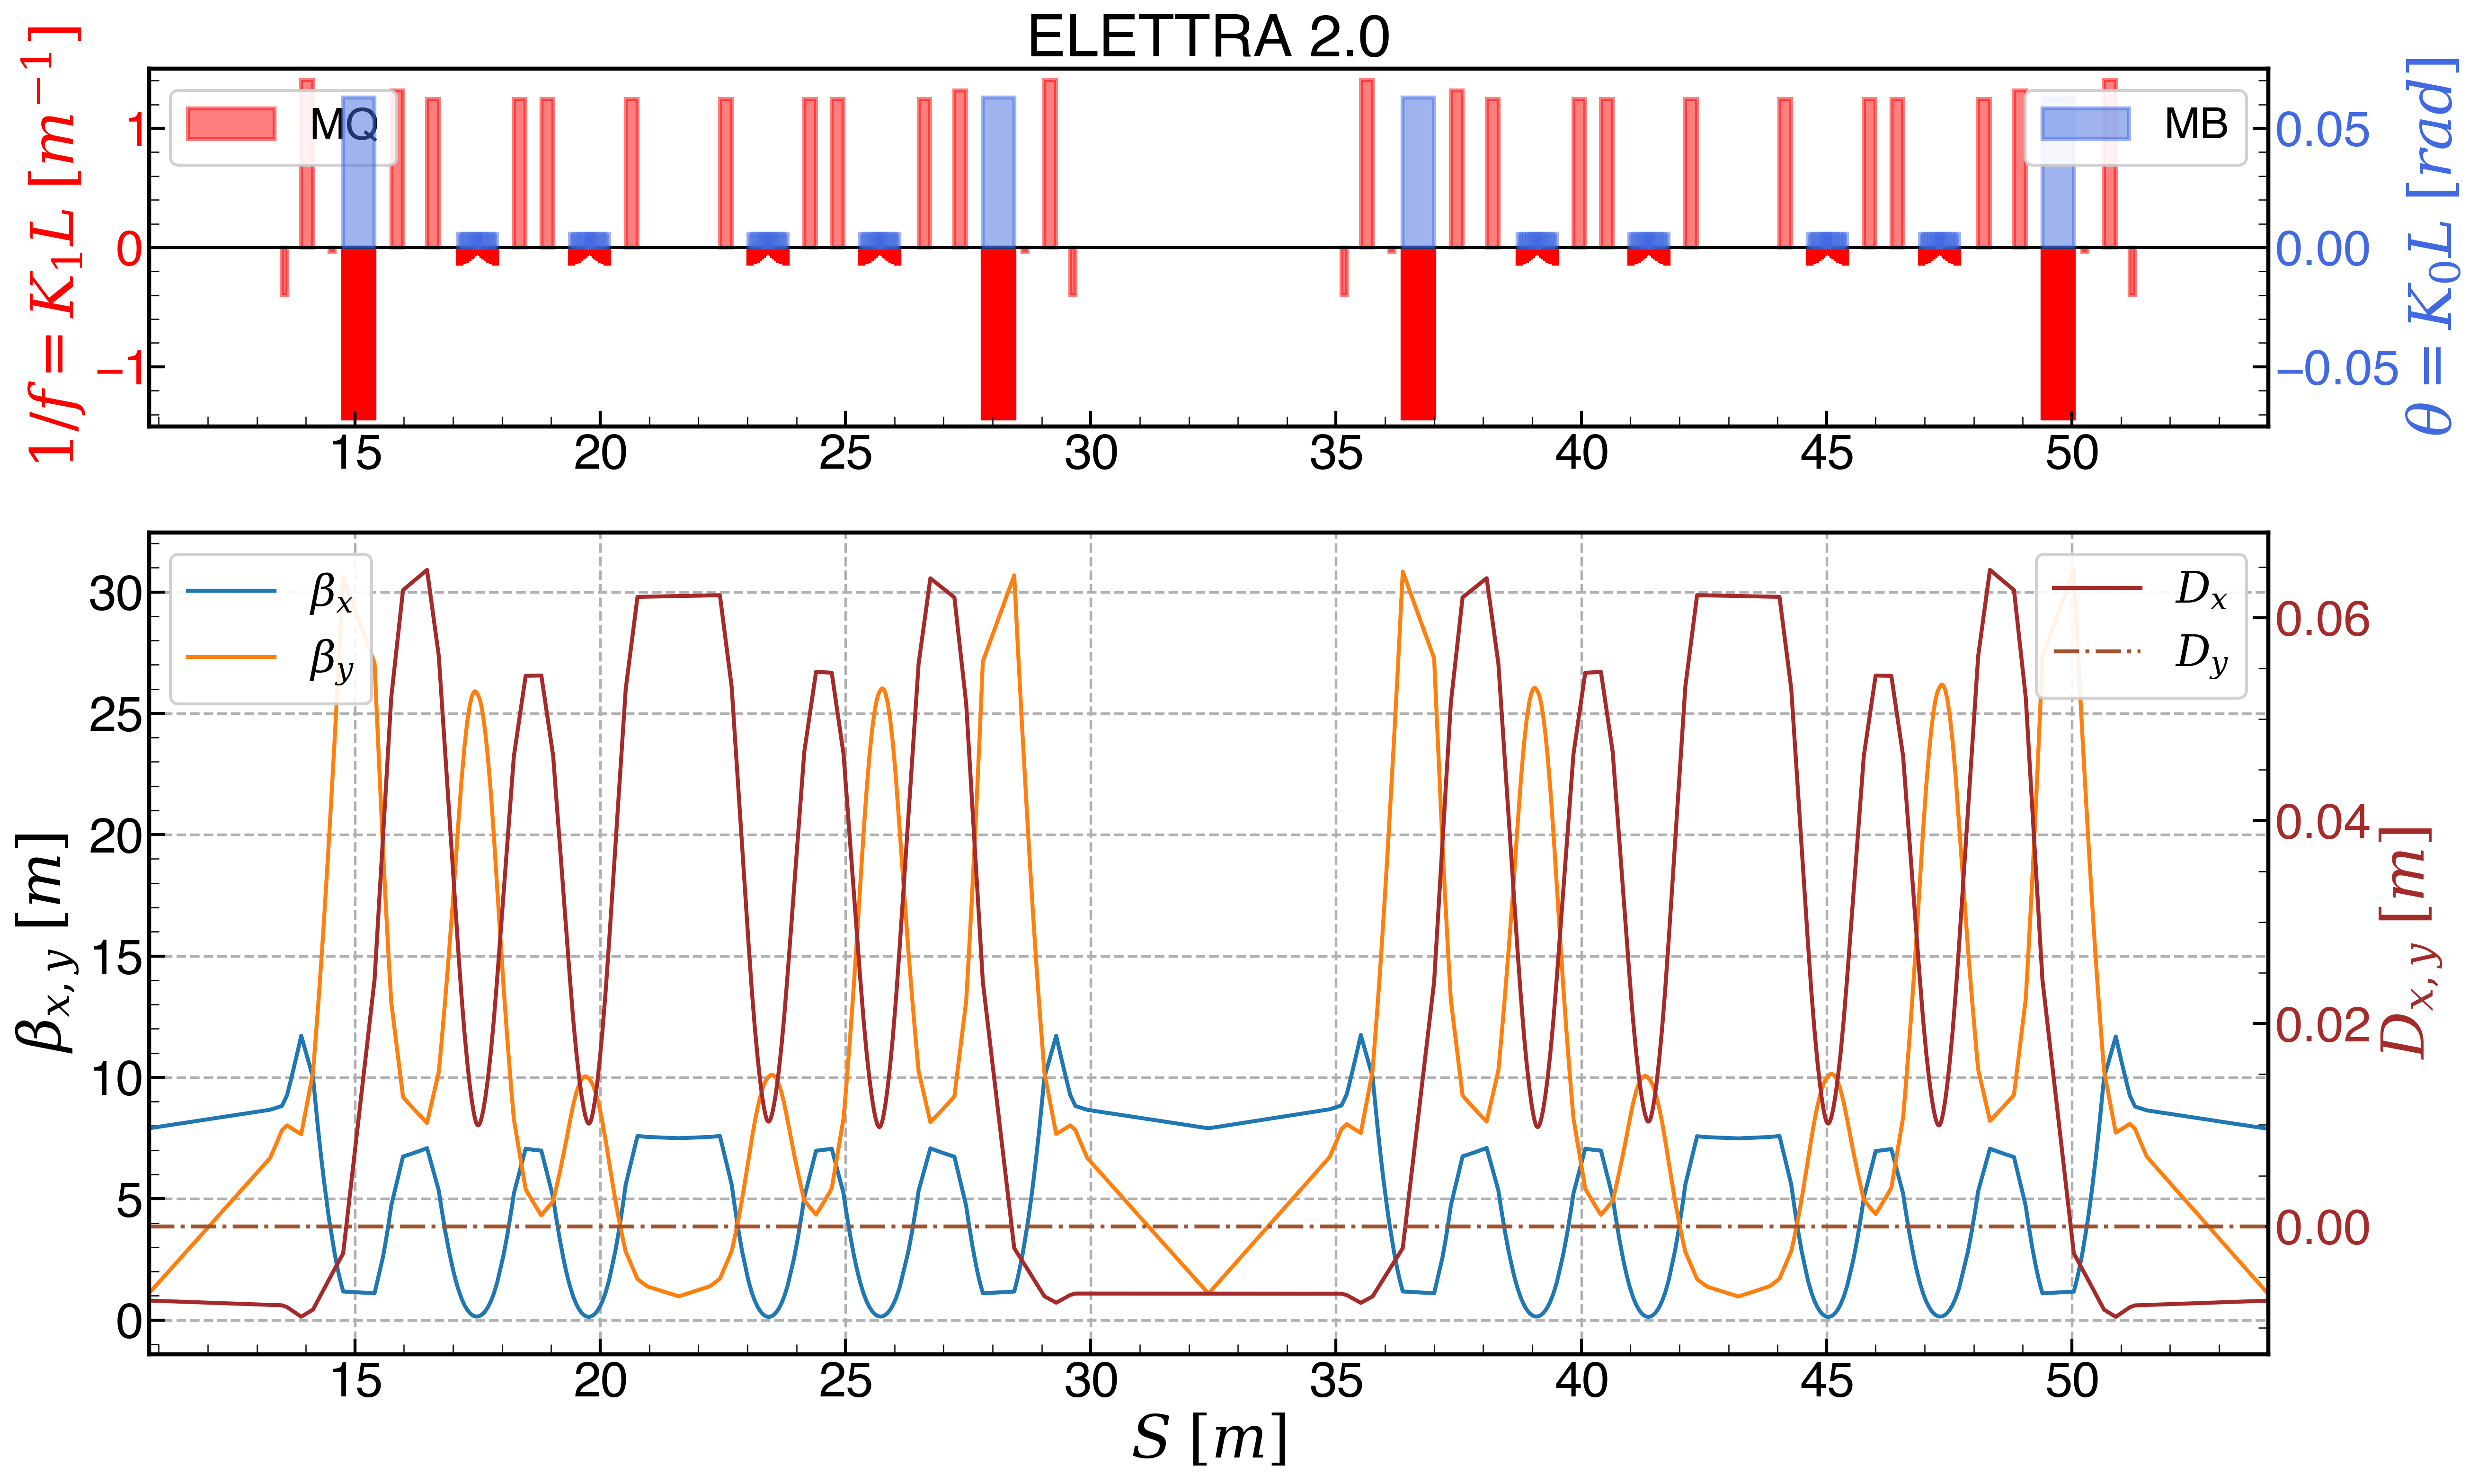

In [21]:
s_start = twiss[twiss.name == "ll:1"]["s"][0]
s_end = twiss[twiss.name == "ll:5"]["s"][0]

fig_lattice = cpymadtools.plotters.LatticePlotter.plot_latwiss(
    madx=madx,
    title="ELETTRA 2.0",
    xlimits=(s_start, s_end),
    disp_ylim=None,
    k0l_lim=(-75 * 1e-3, 75 * 1e-3),
    k1l_lim=(-1.5, 1.5),
    plot_dipole_k1=True,
    lw=2,
)

In [11]:
madx.twiss(sequence='ring', table='test_twiss');

In [12]:
test_twiss = madx.table.test_twiss.dframe()

In [13]:
s0 = test_twiss[test_twiss.name=='left_marker:1']['s'][0]
s1 = test_twiss[test_twiss.name=='right_marker:1']['s'][0]

In [15]:
test_twiss[(test_twiss.s>=s0) & (test_twiss.s<=s1) & (test_twiss.keyword=='quadrupole')]

name     keyword       s       betx       alfx  \
qd1_s01.2       qd1_s01.2:1  quadrupole  13.618   9.665626  -3.794427   
qf1_s01.2       qf1_s01.2:1  quadrupole  14.145  10.126651  11.081248   
qd2_s01.2       qd2_s01.2:1  quadrupole  14.588   2.726266   5.515351   
qf2_s01.2       qf2_s01.2:1  quadrupole  15.980   6.825775  -0.291902   
bqf1_s01.2     bqf1_s01.2:1  quadrupole  16.710   5.367674   7.035620   
bqf2_s01.2     bqf2_s01.2:1  quadrupole  18.480   7.236163   0.166580   
bqf3_s01.2     bqf3_s01.2:1  quadrupole  19.040   5.176448   7.257291   
bqf4_s01.2     bqf4_s01.2:1  quadrupole  20.760   7.785525   0.104588   
bqf4_s02.1[2]  bqf4_s02.1:2  quadrupole  22.680   5.729355   7.806568   
bqf3_s02.1[2]  bqf3_s02.1:2  quadrupole  24.400   7.143133  -0.114851   
bqf2_s02.1[2]  bqf2_s02.1:2  quadrupole  24.960   5.351014   7.215457   
bqf1_s02.1[2]  bqf1_s02.1:2  quadrupole  26.730   7.139607   0.364623   
qf2_s02.1[2]    qf2_s02.1:2  quadrupole  27.460   4.770733   7.308821   
qd2_s02.1[2]    qd2_s02.1:2  quadrupole  28.718   4.045683  -6.958368   
qf1_s02.1[2]    qf1_s02.1:2  quadrupole  29.295  11.967473   4.252863   
qd1_s02.1[2]    qd1_s02.1:2  quadrupole  29.688   9.228381   0.321142   

                    mux        bety       alfy       muy             x  ...  \
qd1_s01.2      1.472068   32.057944   0.018371  0.726092 -1.799530e-06  ...   
qf1_s01.2      1.479594   43.895002 -54.694258  0.728593 -1.191420e-06  ...   
qd2_s01.2      1.493063  105.140165 -78.988852  0.729628 -1.125200e-08  ...   
qf2_s01.2      1.926096   39.441441   5.671261  0.732064  3.862917e-06  ...   
bqf1_s01.2     1.943134   42.341560 -42.994535  0.735247  2.413690e-06  ...   
bqf2_s01.2     2.374604   20.543771   8.342338  0.740334 -9.045365e-06  ...   
bqf3_s01.2     2.387662   16.683831 -12.435009  0.745675 -7.062741e-06  ...   
bqf4_s01.2     2.823672    3.456803   3.838247  0.765748  9.261838e-06  ...   
bqf4_s02.1[2]  2.863720    7.026865 -12.775865  1.192459  6.423136e-06  ...   
bqf3_s02.1[2]  3.300262   15.442491  -7.242443  1.207079 -1.234168e-05  ...   
bqf2_s02.1[2]  3.313190   32.228237 -45.658714  1.211511 -1.036816e-05  ...   
bqf1_s02.1[2]  3.744624   33.971936  -5.247451  1.216118  9.610574e-06  ...   
qf2_s02.1[2]   3.762164   56.578933 -73.559131  1.219104  7.820025e-06  ...   
qd2_s02.1[2]   4.193874   88.362860  77.523247  1.220867 -8.150555e-06  ...   
qf1_s02.1[2]   4.205542   32.029451  -0.049780  1.222805 -1.432144e-05  ...   
qd1_s02.1[2]   4.211590   30.850421  11.281028  1.224764 -1.268719e-05  ...   

                      sig54     sig55         sig56     sig61         sig62  \
qd1_s01.2     -2.016793e-17  0.003234 -1.776166e-06  0.000526  2.105497e-04   
qf1_s01.2     -1.187504e-15  0.003234 -1.776087e-06  0.000540 -5.892933e-04   
qd2_s01.2     -1.108773e-15  0.003234 -1.775388e-06  0.000280 -5.718500e-04   
qf2_s01.2      1.120541e-16  0.003831 -2.730768e-06 -0.000397 -3.965760e-05   
bqf1_s01.2    -9.801459e-16  0.003831 -2.730581e-06 -0.000365  4.598706e-04   
bqf2_s01.2     2.539207e-16  0.003630 -6.467016e-07  0.000372  3.196735e-05   
bqf3_s01.2    -4.922541e-16  0.003630 -6.463004e-07  0.000334 -4.253032e-04   
bqf4_s01.2     2.964350e-16  0.003742 -5.813476e-06 -0.000236 -4.813566e-05   
bqf4_s02.1[2]  5.948632e-16  0.003742 -5.813256e-06 -0.000281  3.339203e-04   
bqf3_s02.1[2]  2.647190e-16  0.003643  4.077778e-08  0.000202  6.117979e-05   
bqf2_s02.1[2]  1.060843e-15  0.003643  4.100016e-08  0.000203 -2.102161e-04   
bqf1_s02.1[2]  1.404649e-16  0.003809 -7.940664e-06 -0.000011 -6.325523e-05   
qf2_s02.1[2]   1.334460e-15  0.003809 -7.940705e-06 -0.000050 -3.198155e-07   
qd2_s02.1[2]  -1.110716e-15  0.003232 -4.394005e-06 -0.000086 -6.638960e-05   
qf1_s02.1[2]   2.198936e-17  0.003232 -4.394373e-06 -0.000106  8.622048e-05   
qd1_s02.1[2]  -2.616477e-16  0.003232 -4.394506e-06 -0.000074  5.811711e-05   

                      sig63         sig64         sig65    sig66   n1  
qd1_s01.2      5.0407

In [45]:
test_twiss[(test_twiss.s>=s0) & (test_twiss.s<=s1)]['bety']

ll                  0.102063
left_marker         0.102063
left_marker[2]      0.102063
ll[2]              60.210130
dmon[17]           61.430840
                     ...    
mon[18]            61.362469
dmon[48]           60.139937
ll[3]               0.101495
right_marker        0.101495
right_marker[2]     0.101495
Name: bety, Length: 312, dtype: float64

(10.800000021538462, 32.40000006461531)

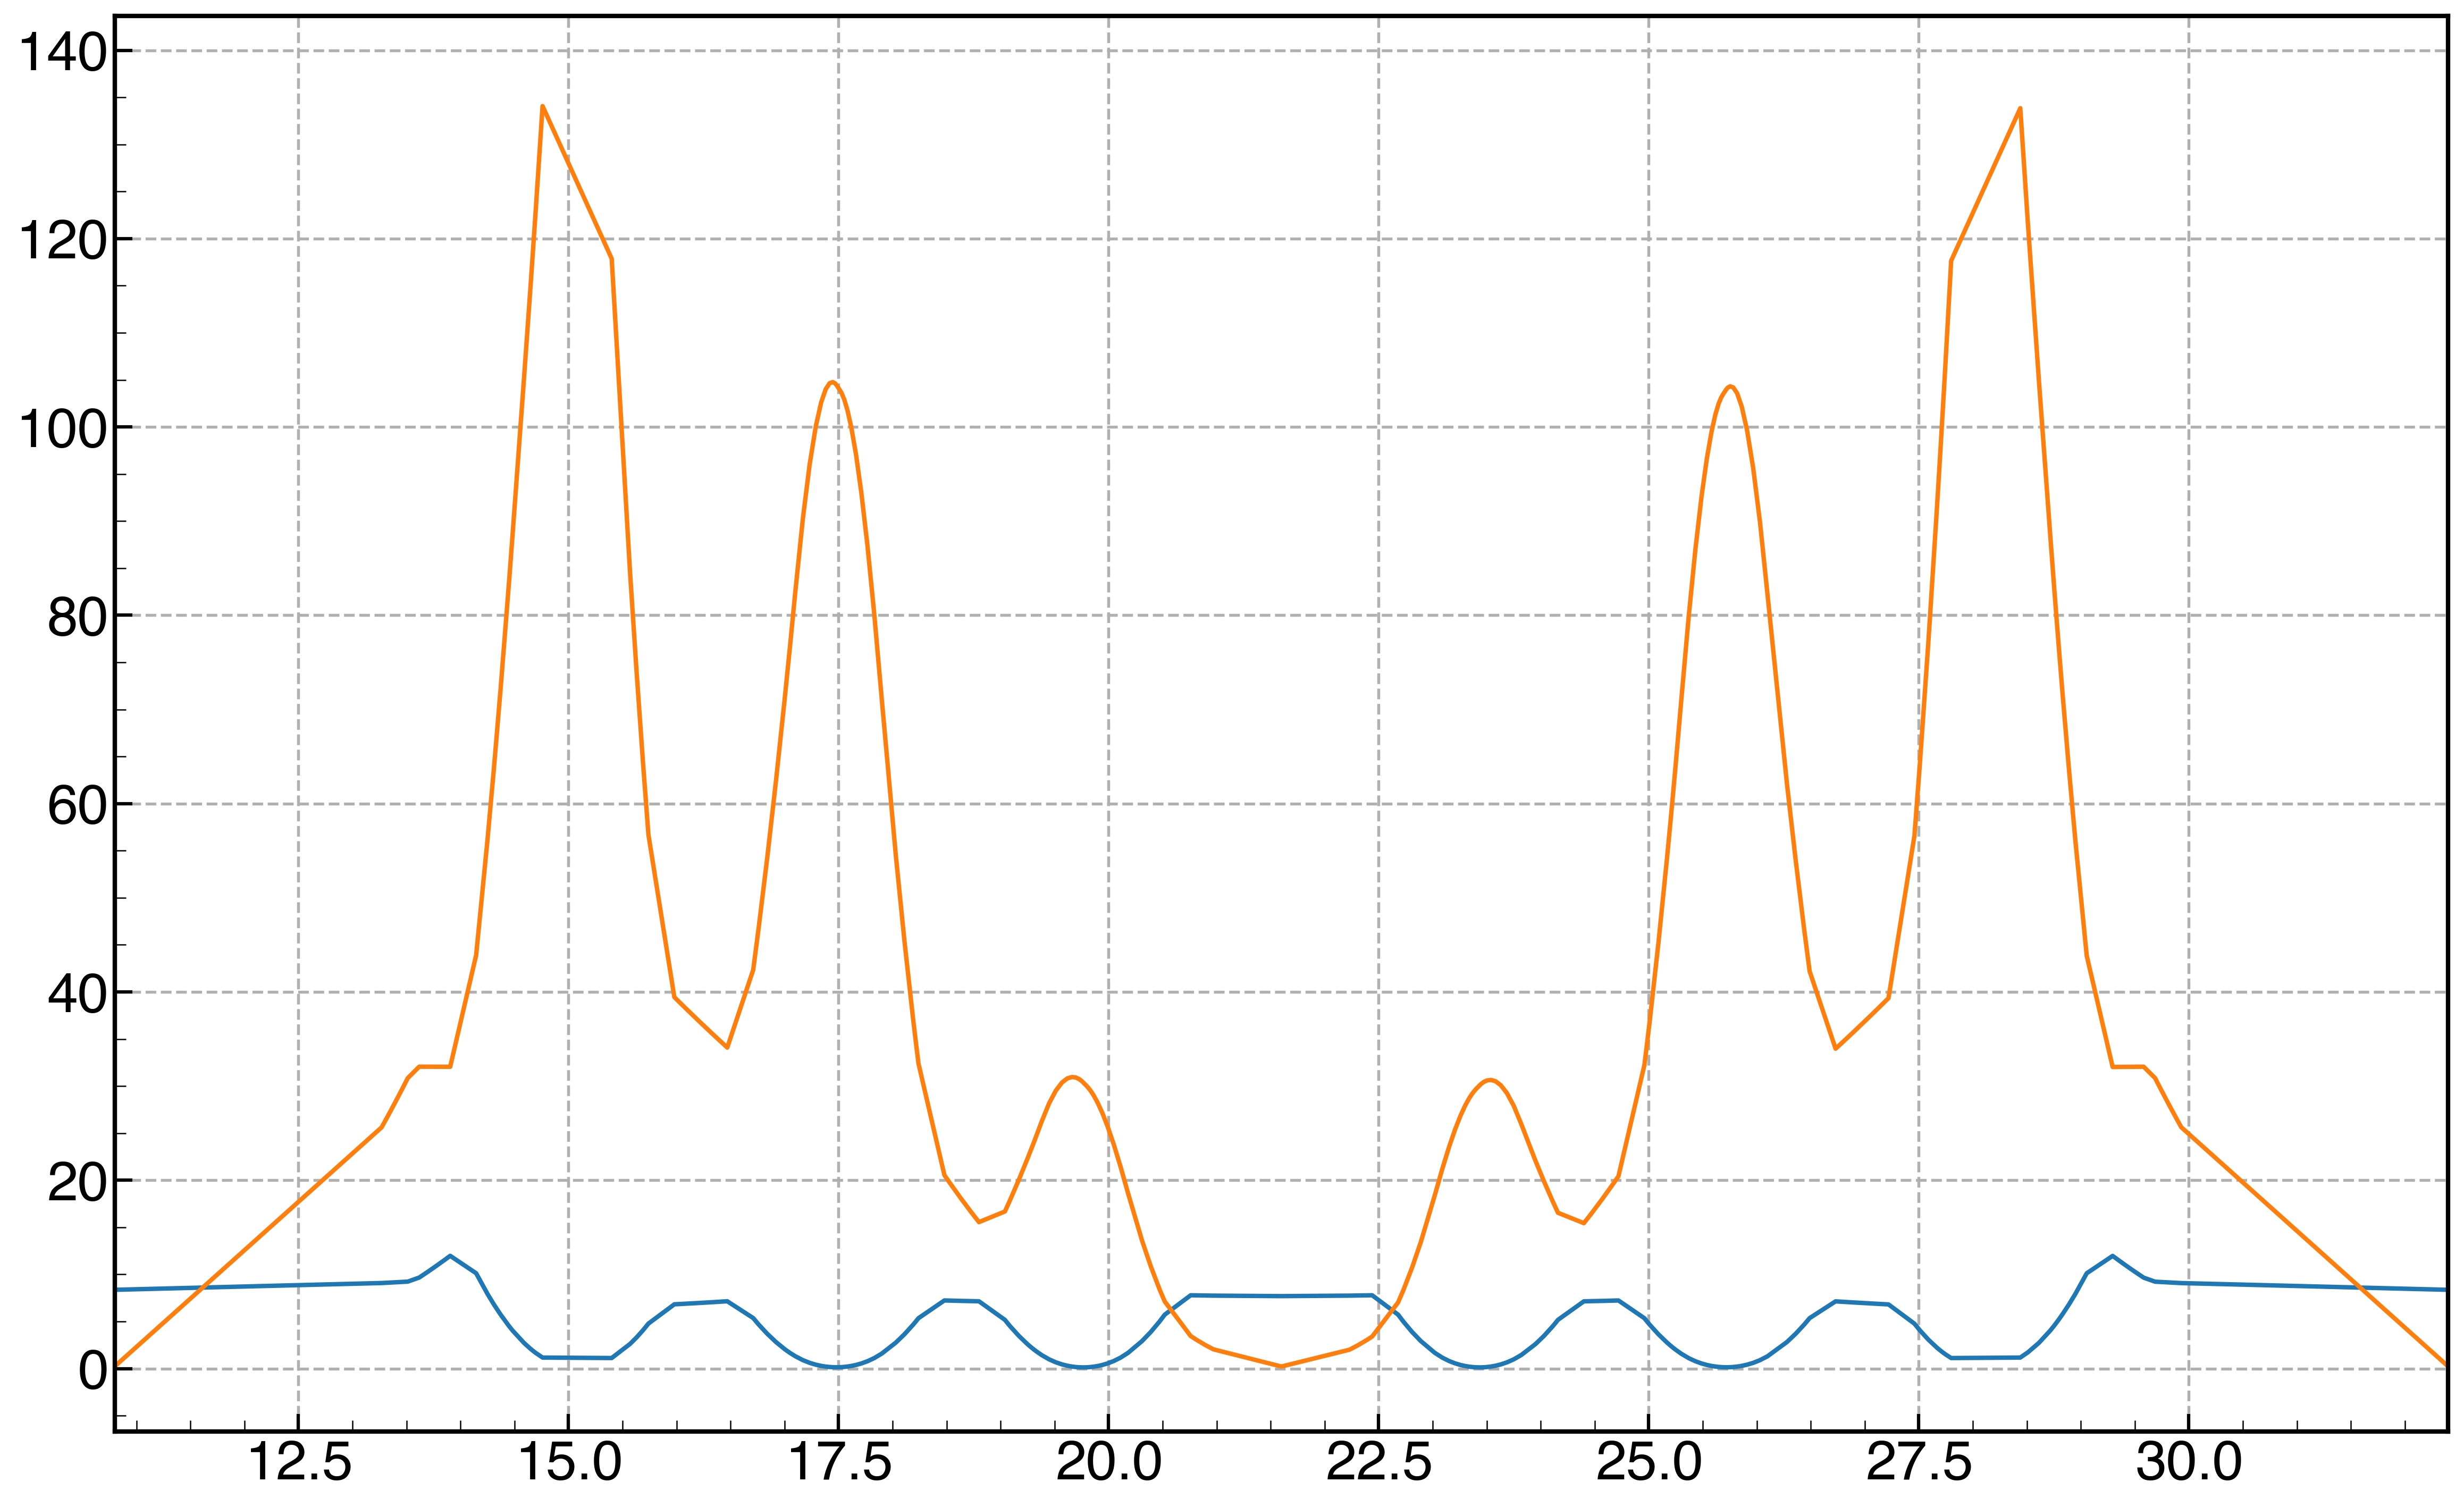

In [18]:
s_start = twiss[twiss.name == "ll:1"]["s"][0]
s_end = twiss[twiss.name == "ll:3"]["s"][0]

plt.plot(twiss['s'], twiss['betx'], lw=2)
plt.plot(twiss['s'], twiss['bety'], lw=2)
plt.xlim(s_start, s_end)

In [17]:
madx.input(
    """
match, sequence=ring;
vary, name=k1_qd1, step=1e-6;
vary, name=k1_qf1, step=1e-6;
vary, name=k1_qd2, step=1e-6;
vary, name=k1_qf2, step=1e-6;
vary, name=k1_bqf1, step=1e-6;
vary, name=k1_bqf2, step=1e-6;
vary, name=k1_bqf3, step=1e-6;
vary, name=k1_bqf4, step=1e-6;
constraint, range=ll[1], dx=0, dy=0, betx=8.36888, bety=1.410758;
constraint, range=ss[2], dx=0.056474, dy=0, betx=7.726541, bety=1.181956;
lmdif, calls=1000, tolerance=1e-10;
endmatch;


"""
)

++++++ Error: seterrorflag : Errorcode: 1   Reported from pro_twiss:
++++++ Error: seterrorflag : Description: TWISS failed


False

In [14]:
madx.input(
    """
match, sequence=ring;
vary, name=k1_bqf3, step=1e-6;
vary, name=k1_bqf4, step=1e-6;
constraint, range=ss[2], dx=0.056474, dy=0;
lmdif, calls=1000, tolerance=1e-10;
endmatch;


"""
)

True

2021-10-07 18:35:42 | INFO     | pyhdtoolkit.cpymadtools.plotters:638 - Plotting optics functions and machine layout


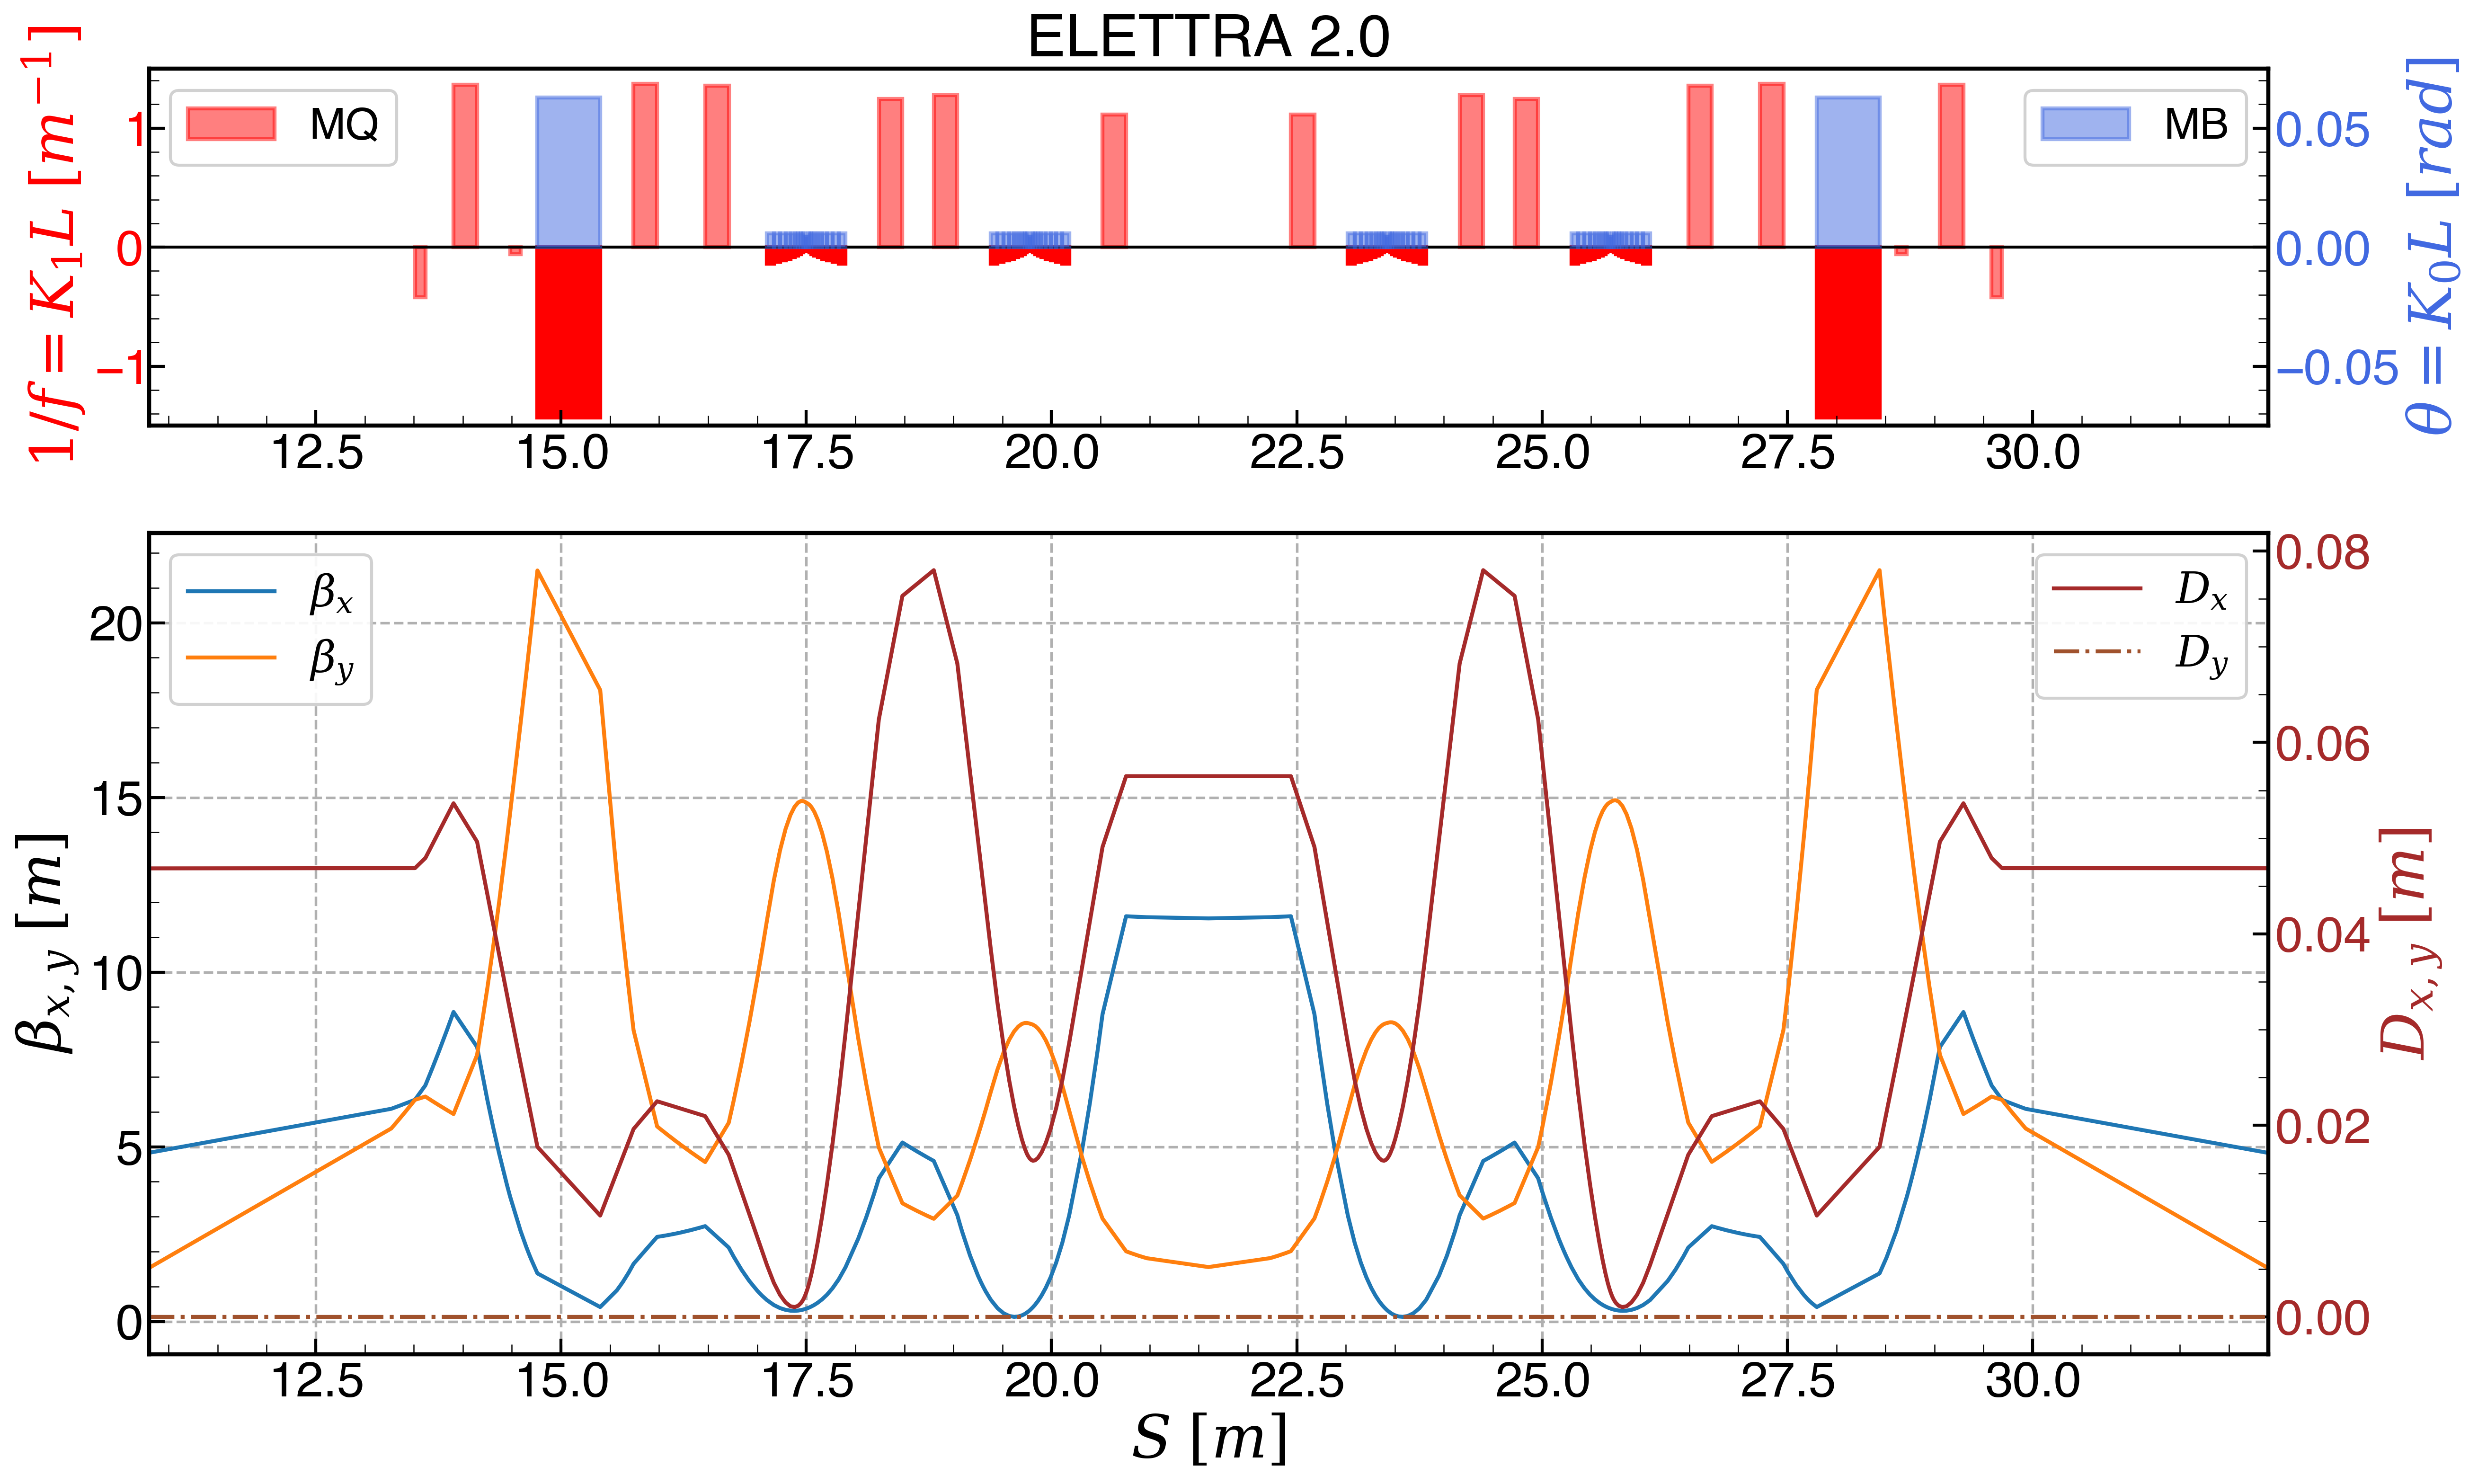

In [15]:
s_start = twiss[twiss.name == "ll:1"]["s"][0]
s_end = twiss[twiss.name == "ll:3"]["s"][0]

fig_lattice = cpymadtools.plotters.LatticePlotter.plot_latwiss(
    madx=madx,
    title="ELETTRA 2.0",
    xlimits=(s_start, s_end),
    disp_ylim=None,
    k0l_lim=(-75 * 1e-3, 75 * 1e-3),
    k1l_lim=(-1.5, 1.5),
    plot_dipole_k1=True,
    lw=2,
)

2021-10-07 16:55:18.709 | INFO     | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:638 - Plotting optics functions and machine layout
2021-10-07 16:55:18.710 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:639 - Getting Twiss dataframe from cpymad
2021-10-07 16:55:19.182 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:_make_elements_groups:1319 - Getting different element groups dframes from MAD-X twiss table
2021-10-07 16:55:19.242 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:_plot_machine_layout:1191 - Plotting machine layout
2021-10-07 16:55:20.434 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:665 - Plotting beta functions
2021-10-07 16:55:20.450 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:673 - Plotting dispersion functions
2021-10-07 16:55:20.472 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:687 - Setting ylim for dispersion plot
2021-10-07 16:55:20.473 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:691 - Setting xlim 

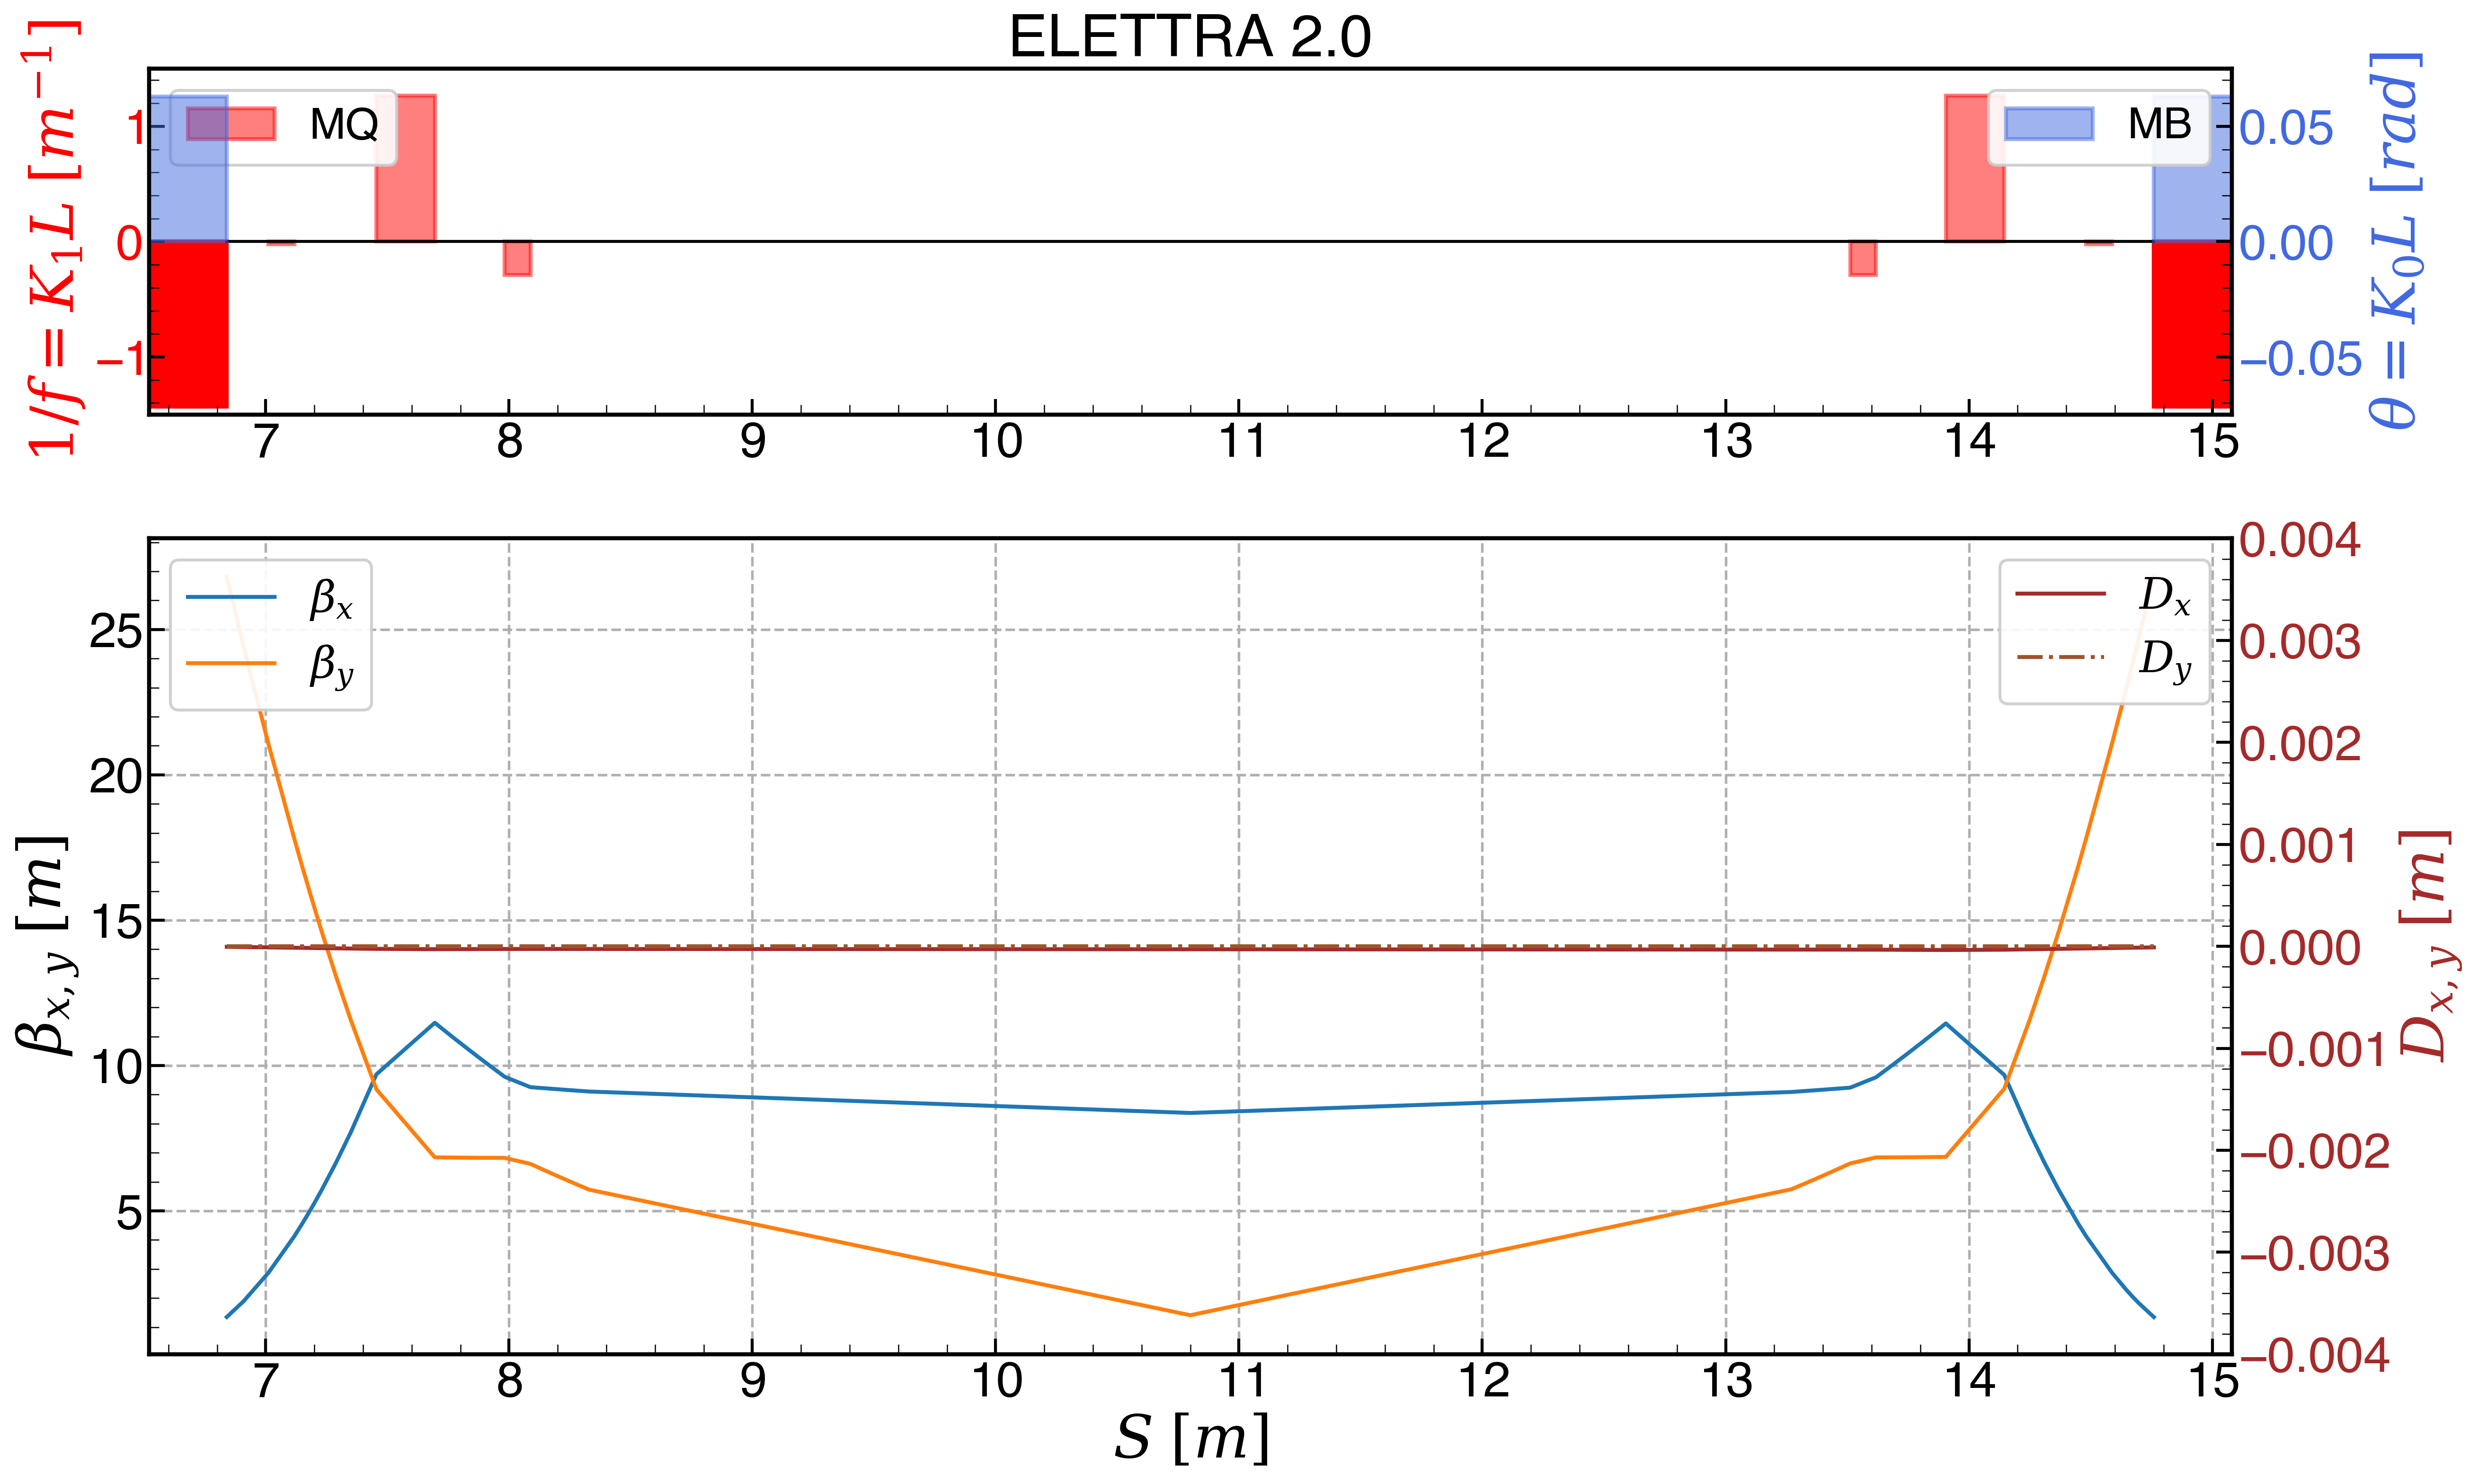

In [11]:
s_start = twiss[twiss.name == "bf1:1"]["s"][0] - twiss[twiss.name == "bf1:1"]["l"][0] / 2
s_end = twiss[twiss.name == "bf1:2"]["s"][0] - twiss[twiss.name == "bf1:2"]["l"][0] / 2

fig_lattice = cpymadtools.plotters.LatticePlotter.plot_latwiss(
    madx=madx,
    title="ELETTRA 2.0",
    xlimits=(s_start, s_end),
    disp_ylim=(-0.004, 0.004),
    k0l_lim=(-75 * 1e-3, 75 * 1e-3),
    k1l_lim=(-1.5, 1.5),
    plot_dipole_k1=True,
    lw=2,
)

In [16]:
# Compute Emittance

madx.input(
    f"""
emit, deltap={madx.globals.deltap};
emit, deltap={madx.globals.deltap};
"""
)

# Stop MAD-X instance

# madx.quit()

# Get the emittance from the standard output

ex, ey, ez = elettra_toolbox.get_emittances_from_madx_output("stdout.out", to_meters=True)


print(f"Emittance x : {ex*1e12} pm")

Emittance x : 1881.3494 pm


In [75]:
k1_vader_0 = -1.962662
delta_vader_max = 0.1
n_points = 100

k1_vader_scan = np.linspace(k1_vader_0 - delta_vader_max, k1_vader_0 + delta_vader_max, n_points)

In [76]:
from cpymad.madx import TwissFailed
import logging

In [77]:
LOGGER = logging.getLogger()

In [78]:
emit_ex_results = {}

for k in k1_vader_scan:
    madx.globals.k1_vader = k
    try:
        madx.twiss(sequence='ring')
        madx.input(
            f"""
        emit, deltap={madx.globals.deltap};
        emit, deltap={madx.globals.deltap};
        """
        )
        ex, ey, ez = elettra_toolbox.get_emittances_from_madx_output("stdout.out", to_meters=True)
        emit_ex_results[k] = ex
    except TwissFailed:
        LOGGER.debug(f"Twiss failed when using k = {k} for k1_vader")
        emit_ex_results[k] = np.nan

++++++ Error: seterrorflag : Errorcode: 1   Reported from pro_twiss:
++++++ Error: seterrorflag : Description: TWISS failed
++++++ Error: seterrorflag : Errorcode: 1   Reported from pro_twiss:
++++++ Error: seterrorflag : Description: TWISS failed
++++++ Error: seterrorflag : Errorcode: 1   Reported from pro_twiss:
++++++ Error: seterrorflag : Description: TWISS failed
++++++ Error: seterrorflag : Errorcode: 1   Reported from pro_twiss:
++++++ Error: seterrorflag : Description: TWISS failed
++++++ Error: seterrorflag : Errorcode: 1   Reported from pro_twiss:
++++++ Error: seterrorflag : Description: TWISS failed
++++++ Error: seterrorflag : Errorcode: 1   Reported from pro_twiss:
++++++ Error: seterrorflag : Description: TWISS failed
++++++ Error: seterrorflag : Errorcode: 1   Reported from pro_twiss:
++++++ Error: seterrorflag : Description: TWISS failed
++++++ Error: seterrorflag : Errorcode: 1   Reported from pro_twiss:
++++++ Error: seterrorflag : Description: TWISS failed
++++++ E

In [82]:
res_df = pd.DataFrame(data=emit_ex_results.values(), index=emit_ex_results.keys())

In [84]:
len(emit_ex_results)

100

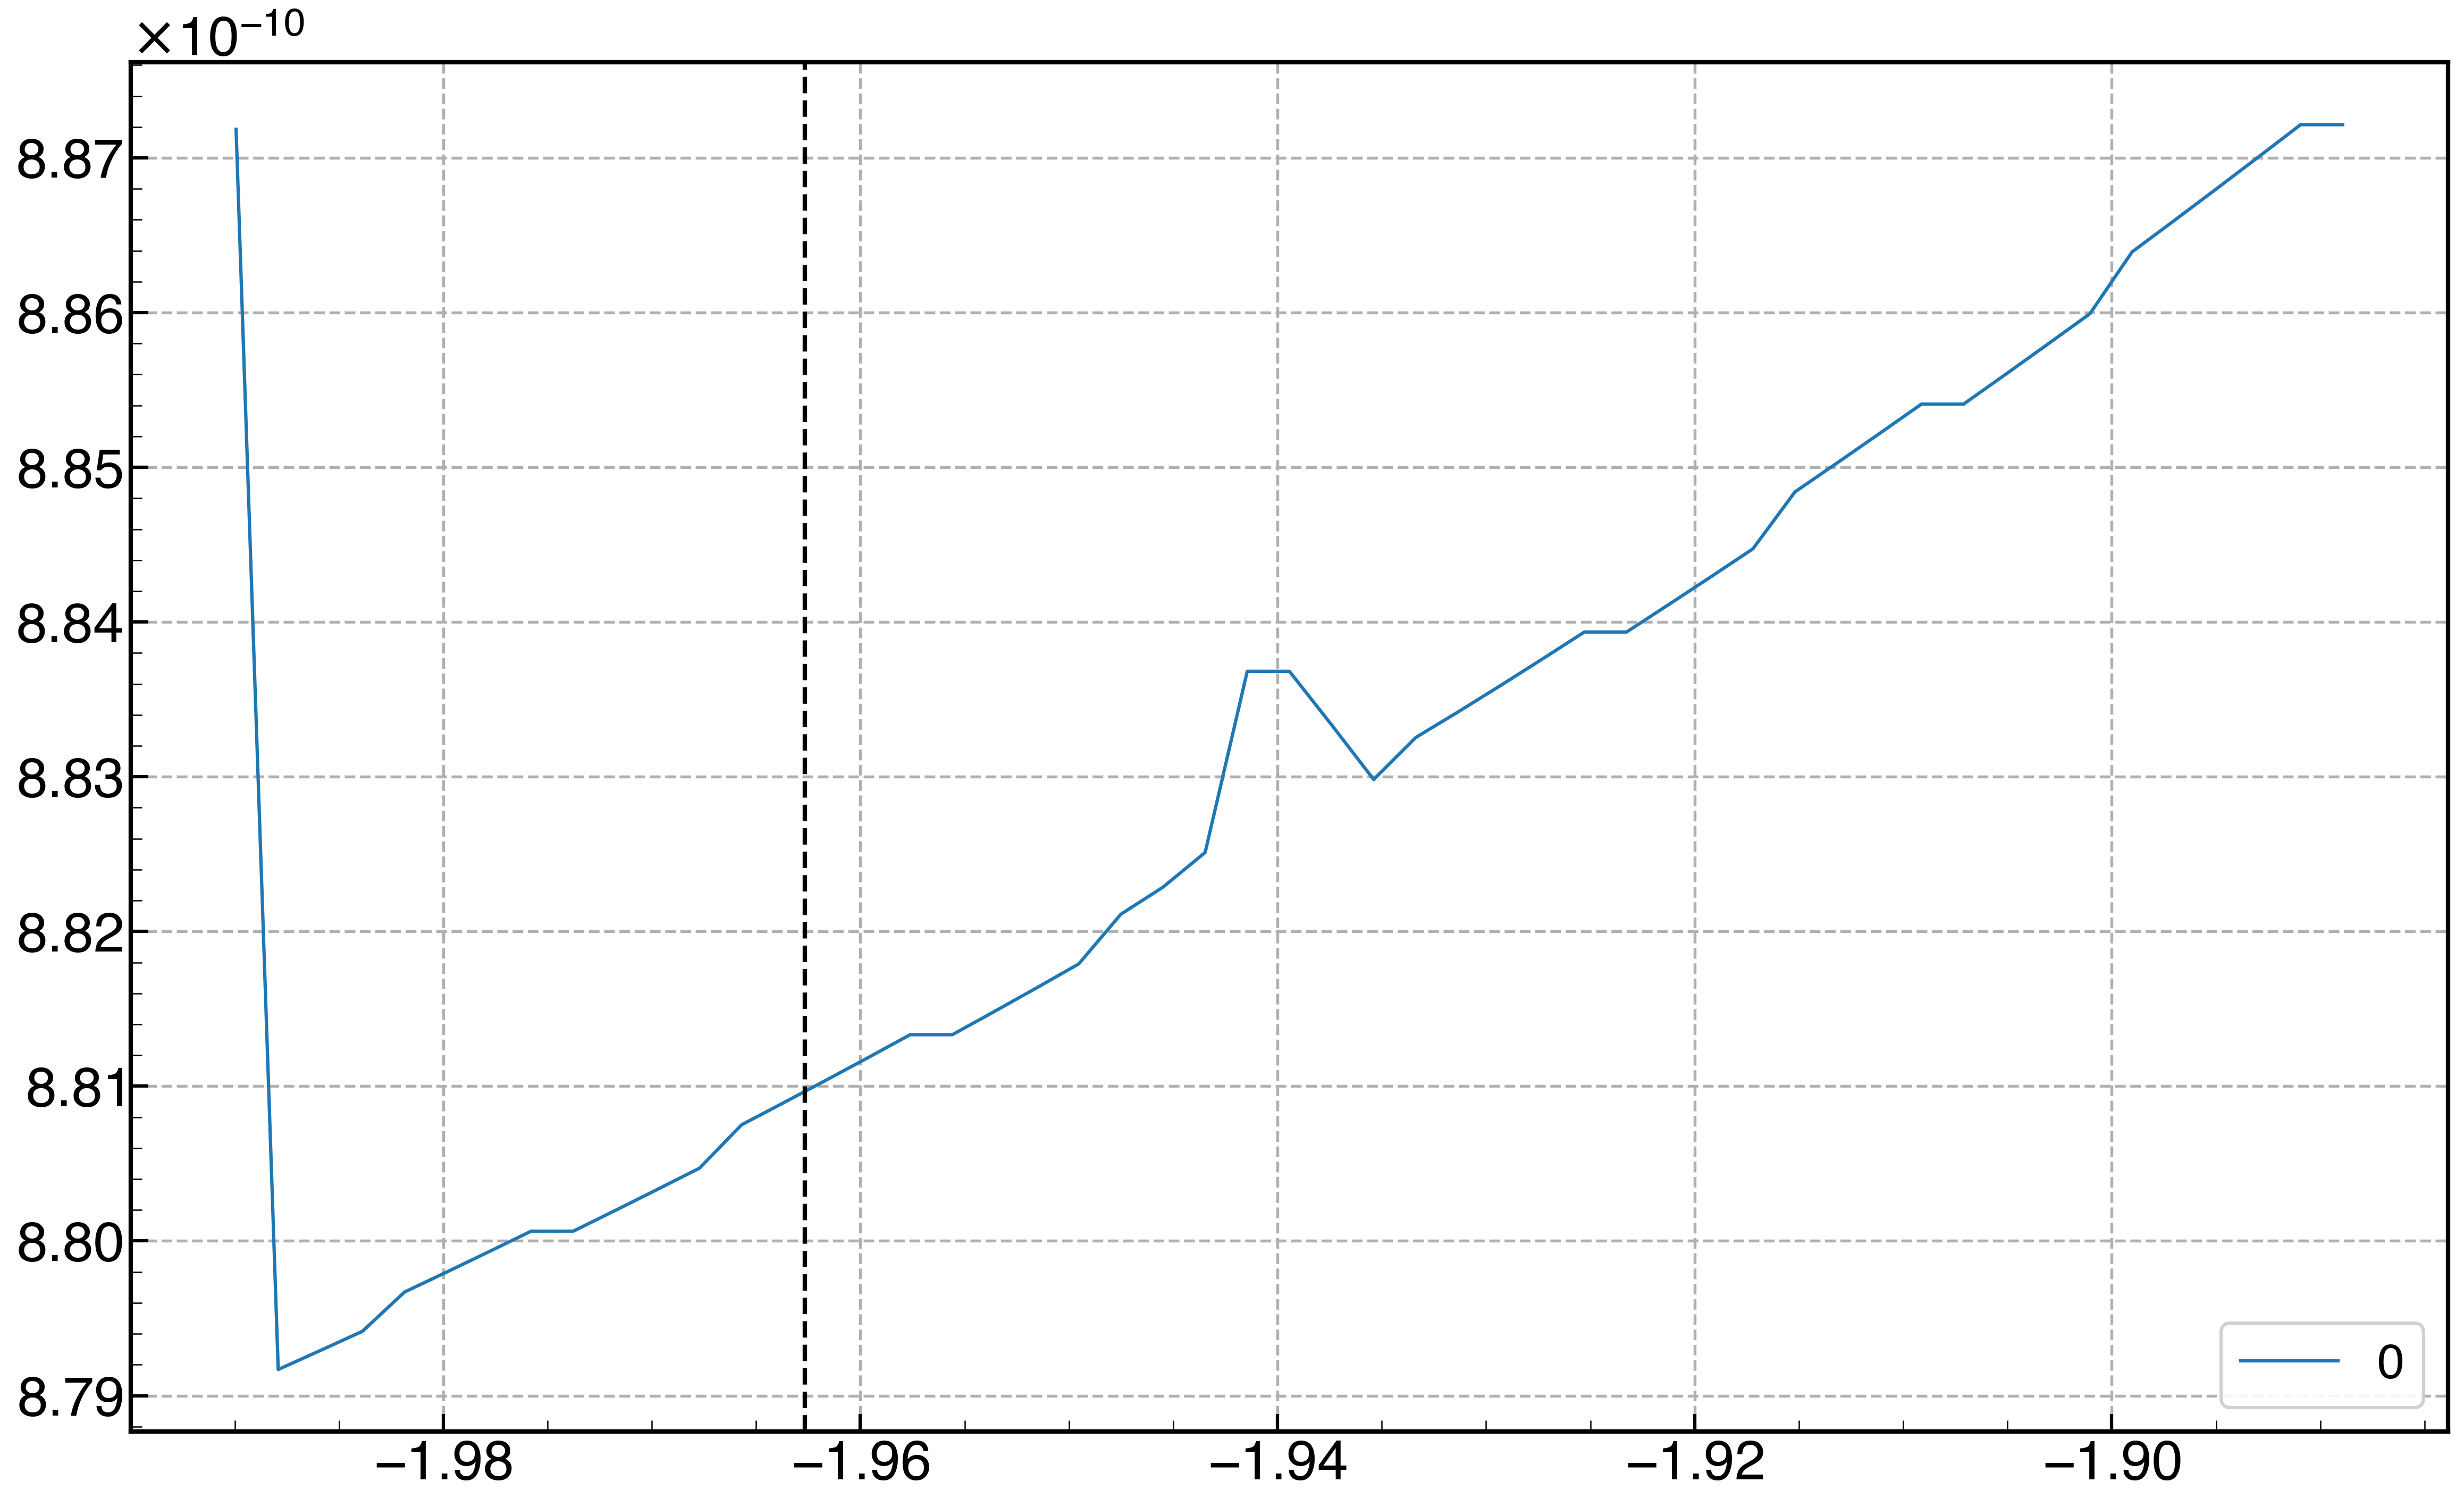

In [93]:
res_df.plot()
plt.axvline(x=k1_vader_0, ls='--', c='k', lw=2)

In [ ]:
plt.plot(emit_ex_results
    )

In [45]:
madx.globals.k1_vader = k1_vader_0 - delta_vader_max
madx.twiss(sequence='ring')
madx.input(
    f"""
emit, deltap={madx.globals.deltap};
emit, deltap={madx.globals.deltap};
"""
)
ex, ey, ez = elettra_toolbox.get_emittances_from_madx_output("stdout.out", to_meters=True)
print(f"Emittance x : {ex*1e12} pm")

Emittance x : 880.20312 pm


----

In [46]:
def H_function(twiss):
    """
    This functions returns an array corresponding to the dispersive invariant H(s). 
    
    Args:
        twiss (pd.DataFrame): DataFrame containing the twiss of interest
    
    Returns:
        A np.ndarray with the result of H(s)
    """
    # Get the np.array and calculate the missing ones
    s = twiss["s"].to_numpy()
    alfx = twiss["alfx"].to_numpy()
    betx = twiss["betx"].to_numpy()
    dx = twiss["dx"].to_numpy()

    dx_p = np.gradient(dx, s)
    gamma_x = (1 + alfx ** 2) / betx

    # Calculate H
    H = gamma_x * dx * dx + 2 * alfx * dx * dx_p + betx * dx_p * dx_p
    return H

In [47]:
curl_H = H_function(madx.table.twiss.dframe())

/Users/apoyet/anaconda3/envs/ELETTRA/lib/python3.8/site-packages/numpy/lib/function_base.py:1073: RuntimeWarning: divide by zero encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/Users/apoyet/anaconda3/envs/ELETTRA/lib/python3.8/site-packages/numpy/lib/function_base.py:1073: RuntimeWarning: invalid value encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/Users/apoyet/anaconda3/envs/ELETTRA/lib/python3.8/site-packages/numpy/lib/function_base.py:1074: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/Users/apoyet/anaconda3/envs/ELETTRA/lib/python3.8/site-packages/numpy/lib/function_base.py:1074: RuntimeWarning: invalid value encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/Users/apoyet/anaconda3/envs/ELETTRA/lib/python3.8/site-packages/numpy/lib/function_base.py:1075: RuntimeWarning: divide by zero encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
/Users/apoyet/anaconda3/envs/ELETTRA/lib/python3.8/site-pack

(10.800000021538462, 32.40000006461531)

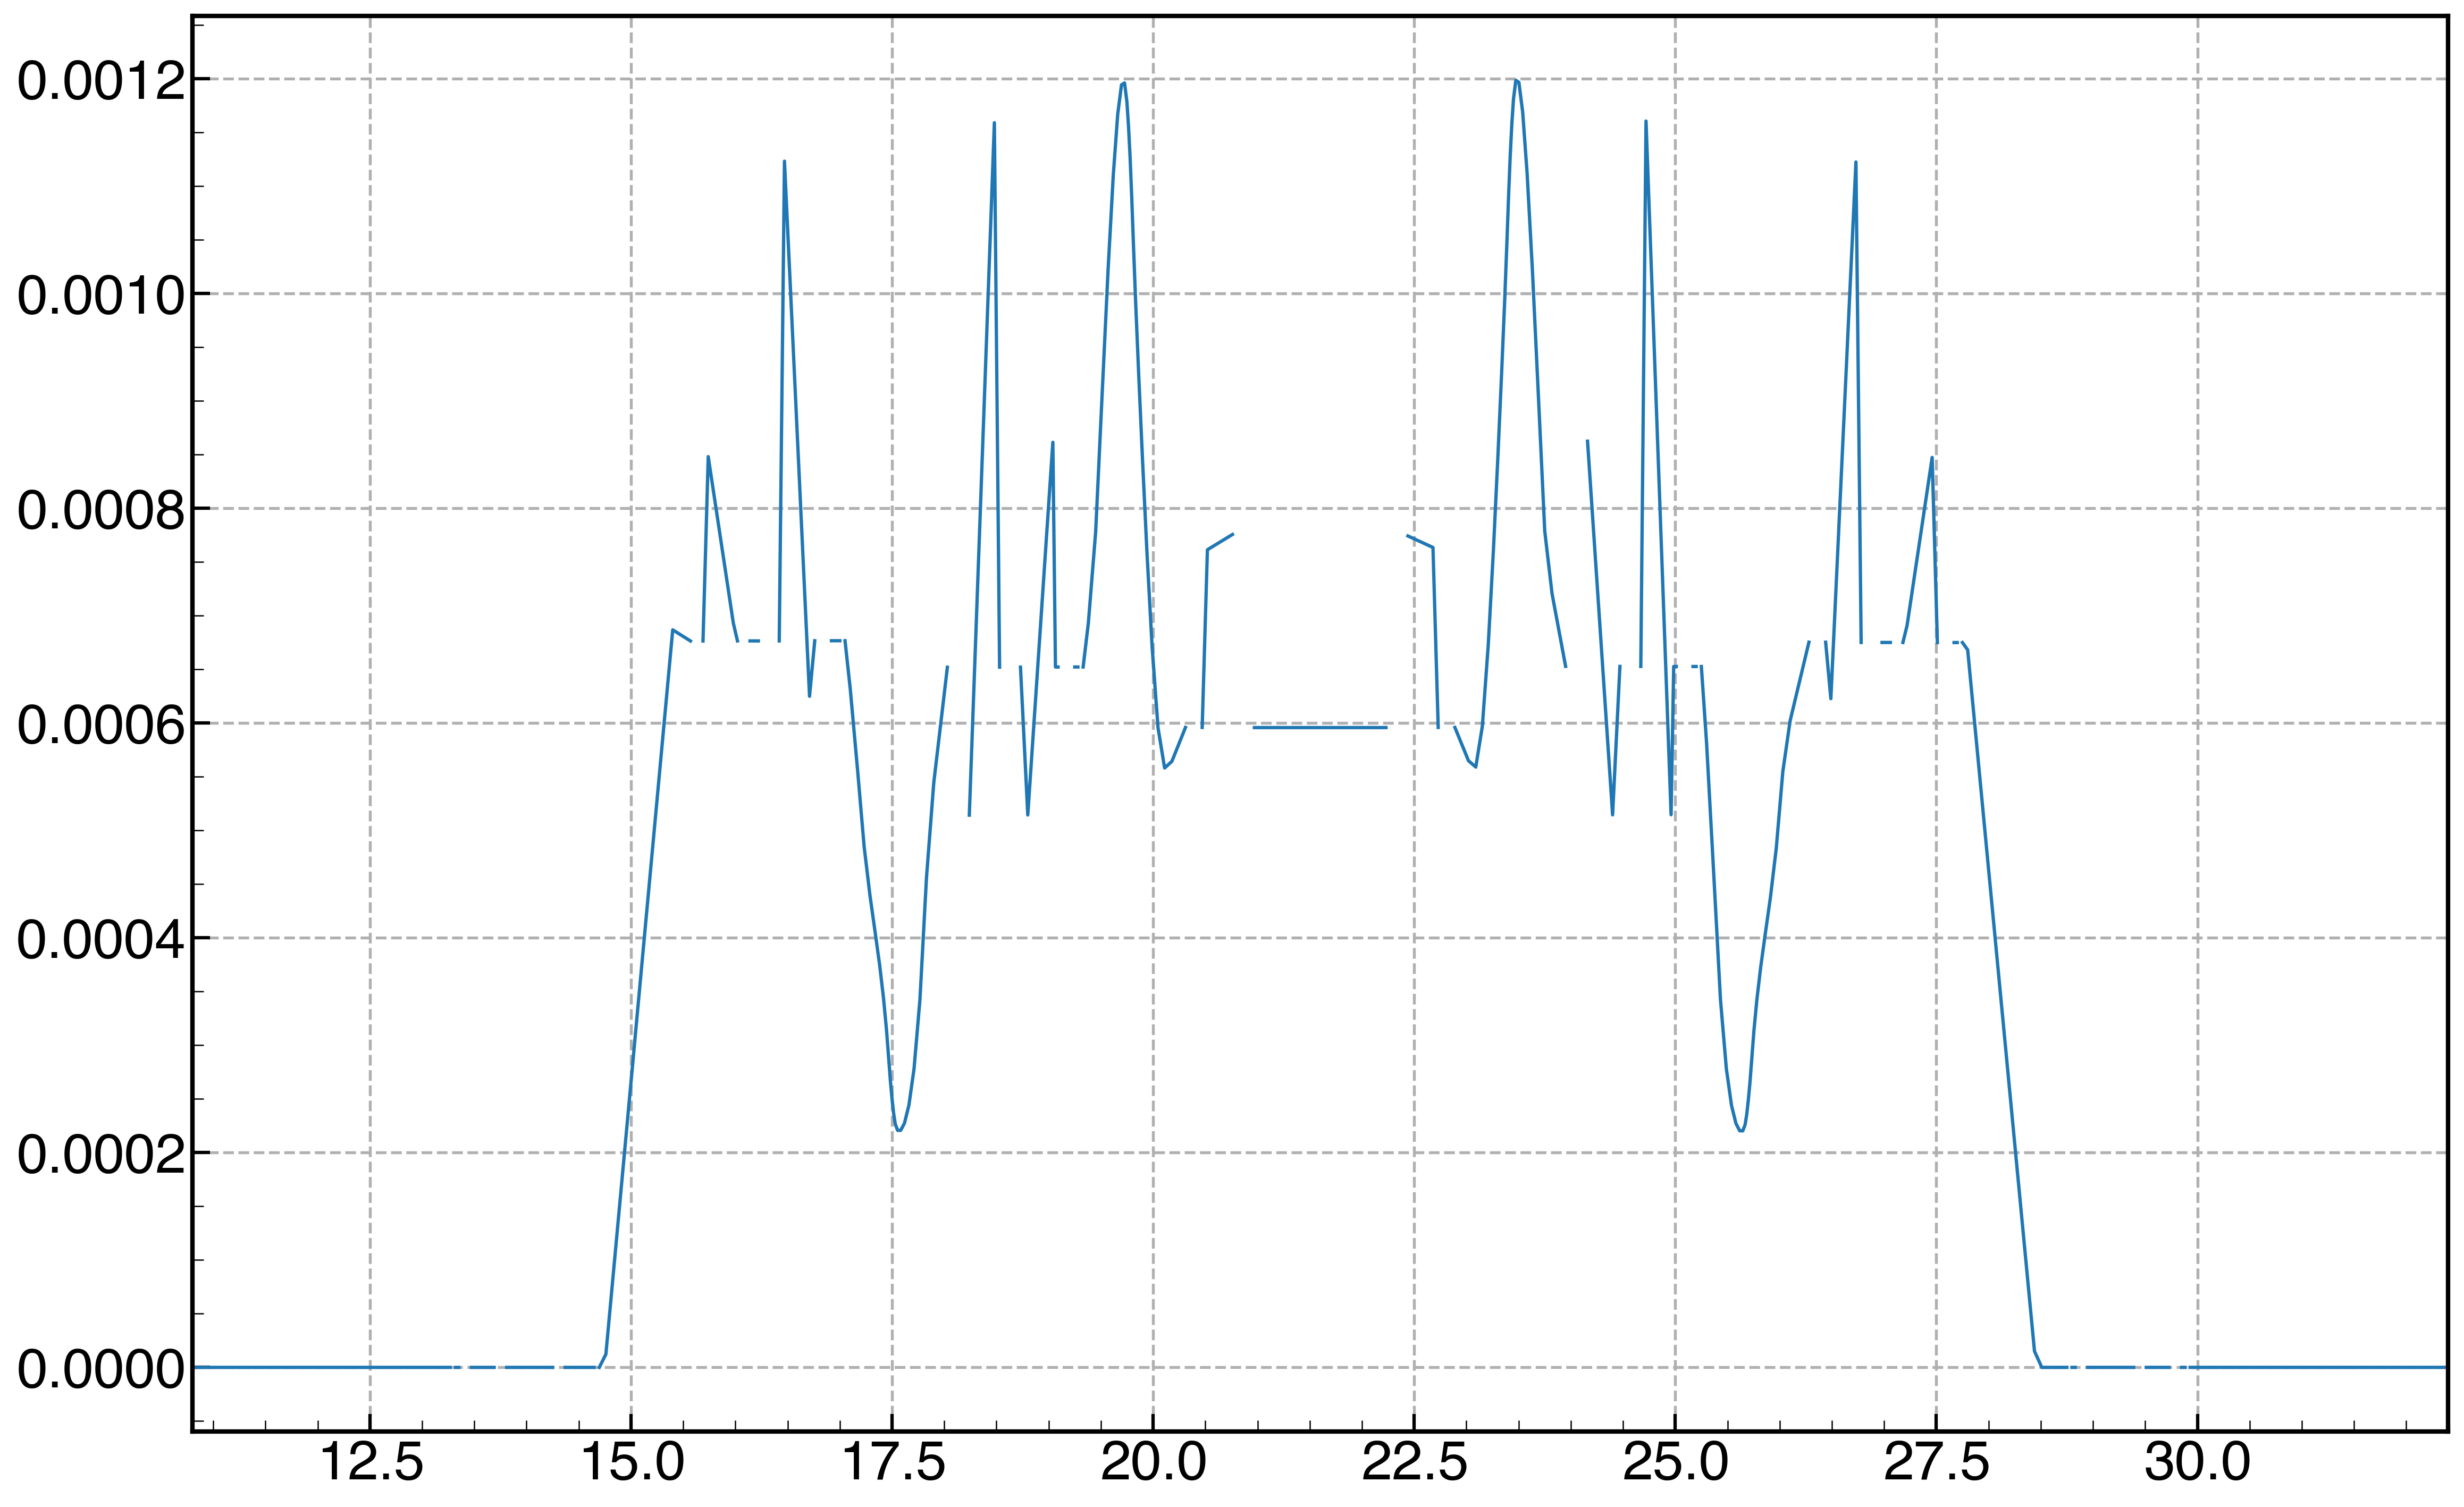

In [51]:
s_start = twiss[twiss.name == "ll:1"]["s"][0]
s_end = twiss[twiss.name == "ll:3"]["s"][0]

plt.plot(twiss['s'],curl_H)
plt.xlim(s_start, s_end)

In [11]:
madx.input(
    """

!match, range=ll[1]/ll[3], dx=0, dy=0;
match, sequence=ring;
vary, name=k1_qd1, step=1e-6;
vary, name=k1_qf1, step=1e-6;
vary, name=k1_qd2, step=1e-6;
vary, name=k1_qf2, step=1e-6;
constraint, range=ll[1], dx=0, dy=0;
constraint, range=ll[3], dx=0, dy=0;
lmdif, calls=1000, tolerance=1e-21;
endmatch;


"""
)

++++++ Error: seterrorflag : Errorcode: 1   Reported from pro_twiss:
++++++ Error: seterrorflag : Description: TWISS failed
++++++ Error: seterrorflag : Errorcode: 1   Reported from pro_twiss:
++++++ Error: seterrorflag : Description: TWISS failed
++++++ Error: seterrorflag : Errorcode: 1   Reported from pro_twiss:
++++++ Error: seterrorflag : Description: TWISS failed


False

2021-10-07 10:06:32.190 | INFO     | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:638 - Plotting optics functions and machine layout
2021-10-07 10:06:32.191 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:639 - Getting Twiss dataframe from cpymad
2021-10-07 10:06:32.669 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:_make_elements_groups:1319 - Getting different element groups dframes from MAD-X twiss table
2021-10-07 10:06:32.734 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:_plot_machine_layout:1191 - Plotting machine layout
2021-10-07 10:06:34.114 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:665 - Plotting beta functions
2021-10-07 10:06:34.130 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:673 - Plotting dispersion functions
2021-10-07 10:06:34.150 | DEBUG    | pyhdtoolkit.cpymadtools.plotters:plot_latwiss:691 - Setting xlim for longitudinal coordinate


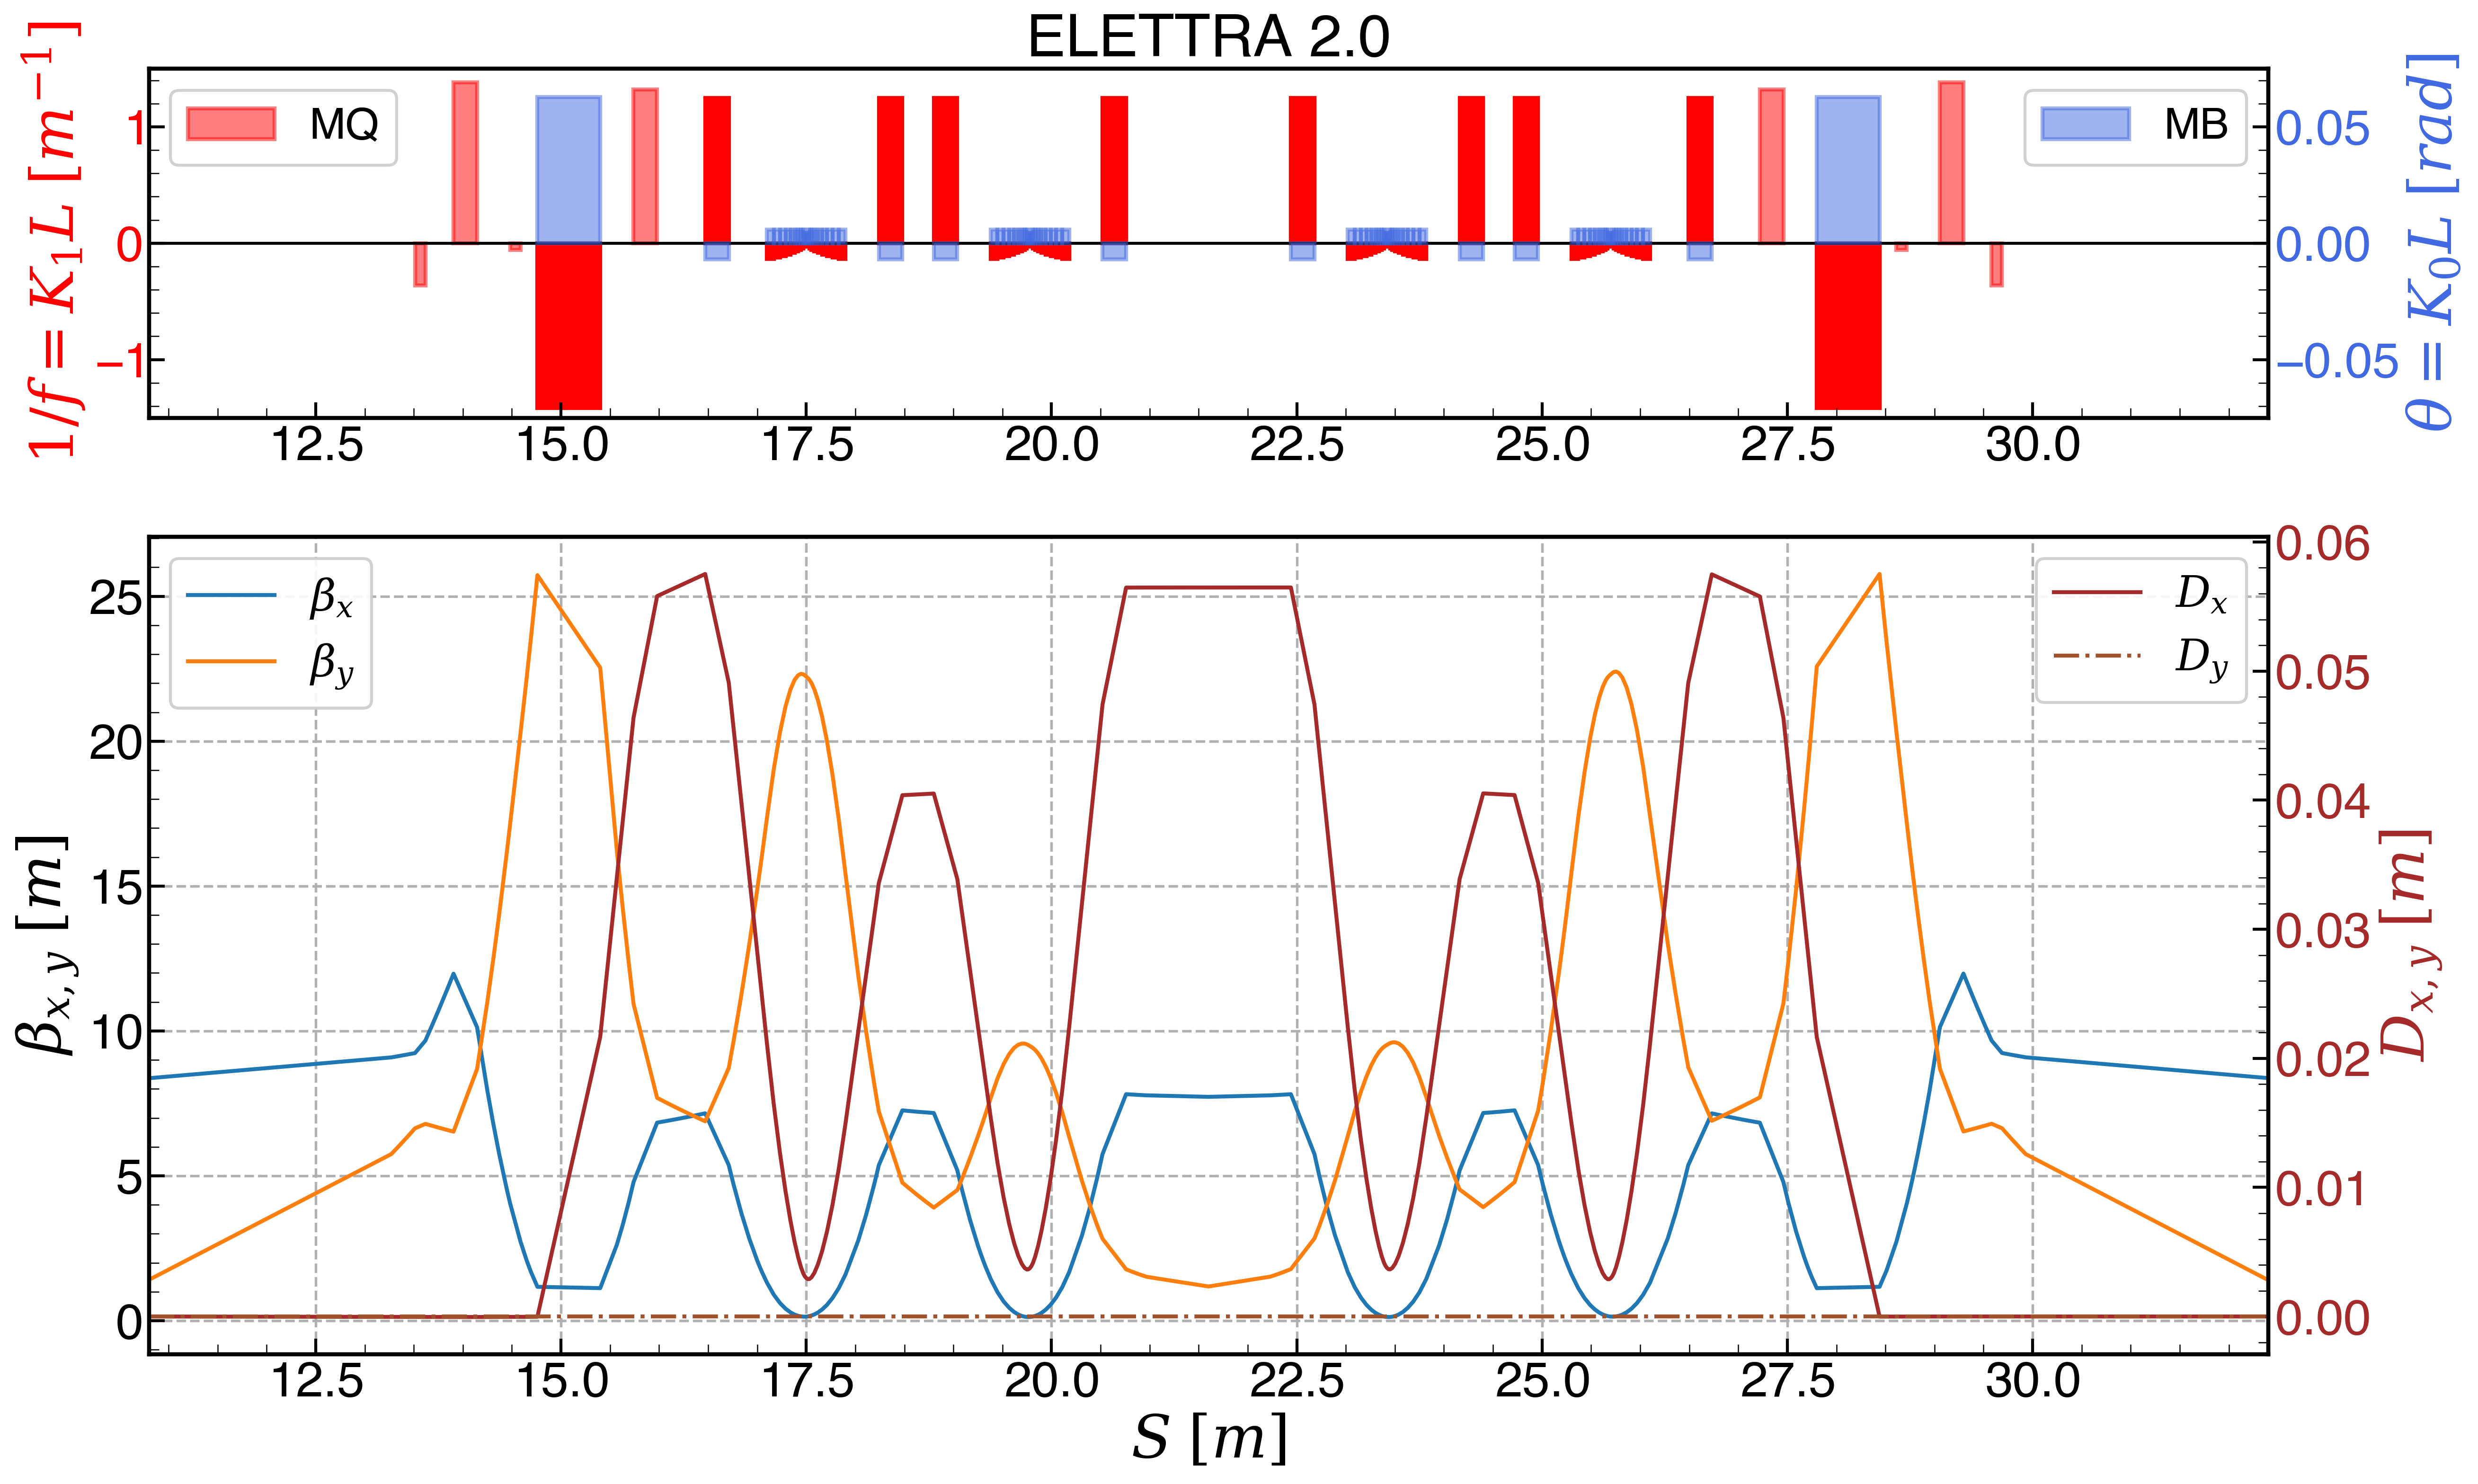

In [7]:
s_start = twiss[twiss.name == "ll:1"]["s"][0]
s_end = twiss[twiss.name == "ll:3"]["s"][0]

fig_lattice = cpymadtools.plotters.LatticePlotter.plot_latwiss(
    madx=madx,
    title="ELETTRA 2.0",
    xlimits=(s_start, s_end),
    disp_ylim=None,
    k0l_lim=(-75 * 1e-3, 75 * 1e-3),
    k1l_lim=(-1.5, 1.5),
    plot_dipole_k1=True,
    lw=2,
)

In [8]:
# Compute Emittance

madx.input(
    f"""
emit, deltap={madx.globals.deltap};
emit, deltap={madx.globals.deltap};
"""
)

# Stop MAD-X instance

# madx.quit()

# Get the emittance from the standard output

ex, ey, ez = elettra_toolbox.get_emittances_from_madx_output("stdout.out", to_meters=True)


print(f"Emittance x : {ex*1e12} pm")

Emittance x : 155.66564 pm
